In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
import sklearn
import statsmodels
%matplotlib inline
from pylab import rcParams

## Problem Statement 1:

### For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

#### 1. Read the data as an appropriate Time Series data and plot the data.

In [22]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,8

In [3]:
df_rose = pd.read_csv("Rose.csv",parse_dates = True, index_col = 0)

In [4]:
df_rose.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

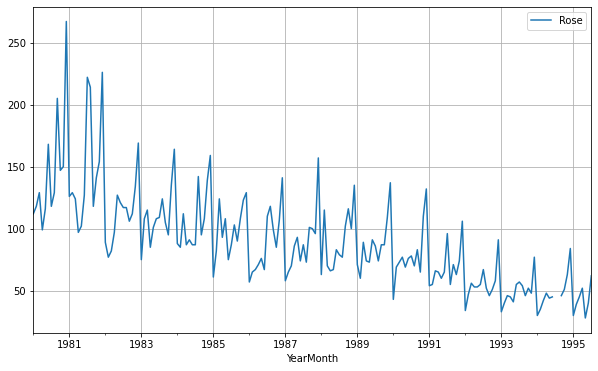

In [363]:
df_rose.plot(figsize=(10,6))
plt.grid();

### 2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

In [13]:
df_rose.describe().T

count       mean        std   min   25%   50%    75%    max
Rose  185.0  90.394595  39.175344  28.0  63.0  86.0  112.0  267.0

In [15]:
df_rose.isnull().values.sum()

2

In [17]:
df_rose.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


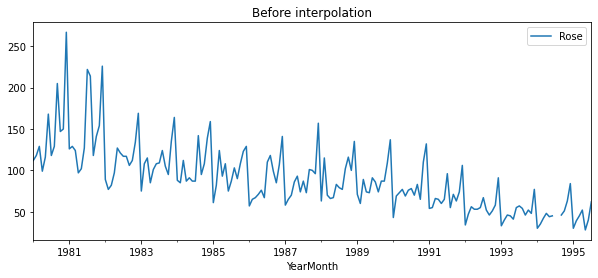

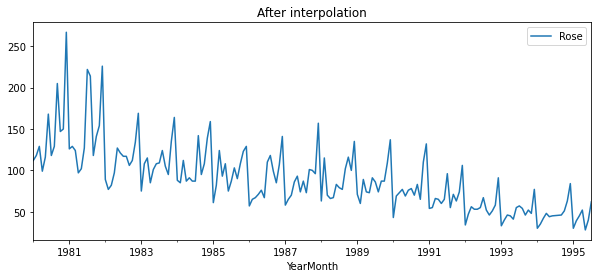

In [364]:
ts = df_rose.resample('MS').mean()
df_imputed = ts.interpolate(method = 'linear')

df_rose.plot(figsize=(10,4))
plt.title('Before interpolation')
plt.show()

df_imputed.plot(figsize=(10,4))
plt.title('After interpolation')
plt.show()

In [38]:
df_imputed.duplicated().sum()

89

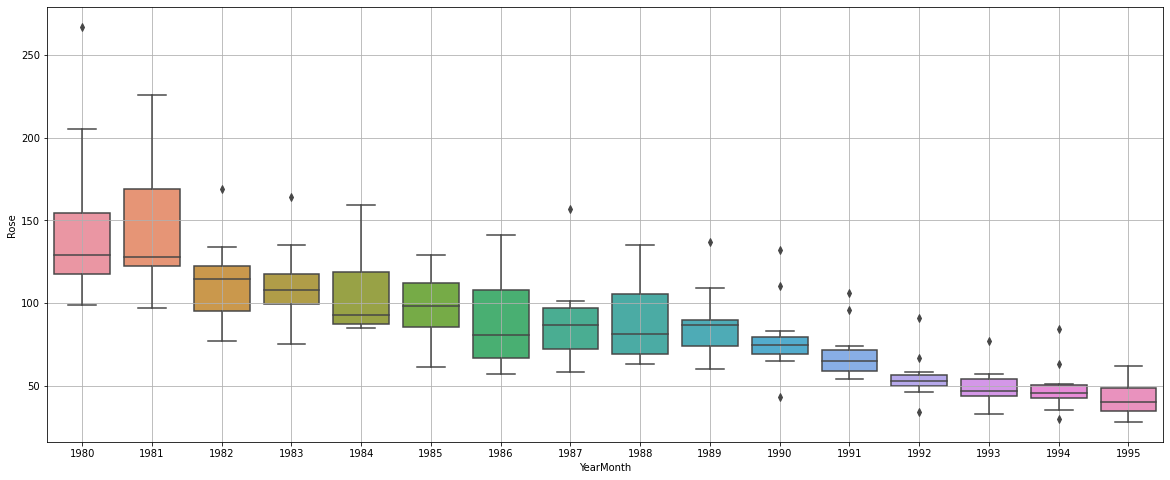

In [39]:
sns.boxplot(x = df_imputed.index.year, y = df_rose['Rose'])
plt.grid();

#### Monthly Boxplot

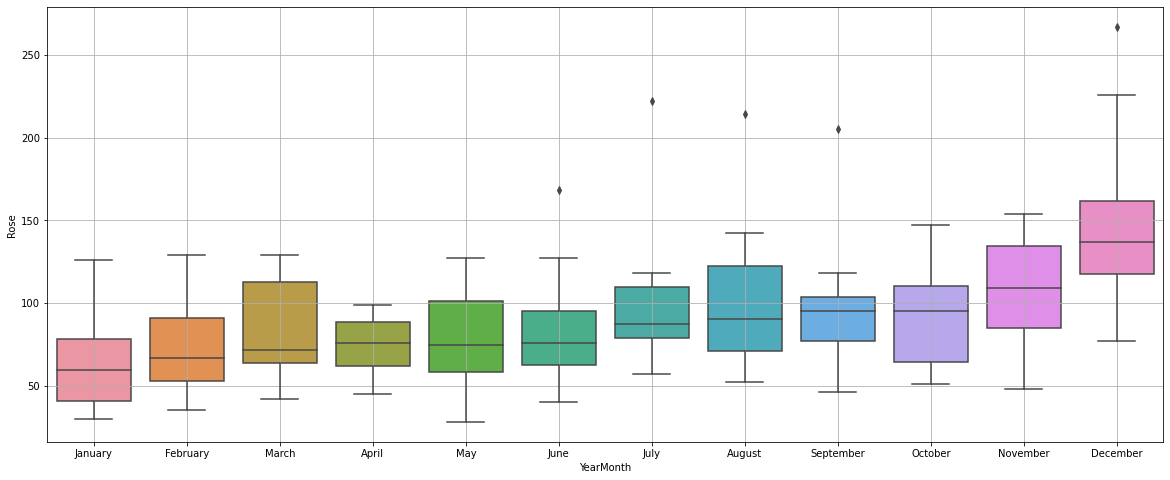

In [40]:
sns.boxplot(x = df_imputed.index.month_name(),y = df_rose['Rose'])
plt.grid();

#### Plot a time series monthplot to understand the spread of accidents across different years and within different months across years

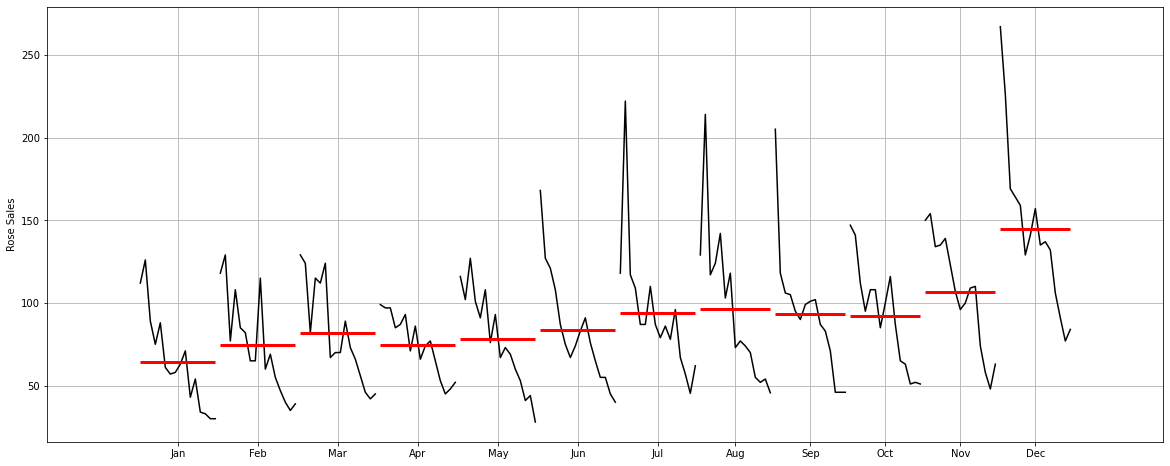

In [41]:
from statsmodels.graphics.tsaplots import month_plot

month_plot(df_imputed['Rose'],ylabel='Rose Sales')
plt.grid();

#### Plot a graph of monthly RoseSales across years.

In [42]:
monthly_sales_across_years = pd.pivot_table(df_imputed, values = 'Rose', columns = df_imputed.index.month, index = df_imputed.index.year)
monthly_sales_across_years

YearMonth     1      2      3     4      5      6           7           8   \
YearMonth                                                                    
1980       112.0  118.0  129.0  99.0  116.0  168.0  118.000000  129.000000   
1981       126.0  129.0  124.0  97.0  102.0  127.0  222.000000  214.000000   
1982        89.0   77.0   82.0  97.0  127.0  121.0  117.000000  117.000000   
1983        75.0  108.0  115.0  85.0  101.0  108.0  109.000000  124.000000   
1984        88.0   85.0  112.0  87.0   91.0   87.0   87.000000  142.000000   
1985        61.0   82.0  124.0  93.0  108.0   75.0   87.000000  103.000000   
1986        57.0   65.0   67.0  71.0   76.0   67.0  110.000000  118.000000   
1987        58.0   65.0   70.0  86.0   93.0   74.0   87.000000   73.000000   
1988        63.0  115.0   70.0  66.0   67.0   83.0   79.000000   77.000000   
1989        71.0   60.0   89.0  74.0   73.0   91.0   86.000000   74.000000   
1990        43.0   69.0   73.0  77.0   69.0   76.0   78.000000   70.000000   
1991        54.0   55.0   66.0  65.0   60.0   65.0   96.000000   55.000000   
1992        34.0   47.0   56.0  53.0   53.0   55.0   67.000000   52.000000   
1993        33.0   40.0   46.0  45.0   41.0   55.0   57.000000   54.000000   
1994        30.0   35.0   42.0  48.0   44.0   45.0   45.333333   45.666667   
1995        30.0   39.0   45.0  52.0   28.0   40.0   62.000000         NaN   

YearMonth     9      10     11     12  
YearMonth                              
1980       205.0  147.0  150.0  267.0  
1981       118.0  141.0  154.0  226.0  
1982       106.0  112.0  134.0  169.0  
1983       105.0   95.0  135.0  164.0  
1984        95.0  108.0  139.0  159.0  
1985        90.0  108.0  123.0  129.0  
1986        99.0   85.0  107.0  141.0  
1987       101.0  100.0   96.0  157.0  
1988       102.0  116.0  100.0  135.0  
1989        87.0   87.0  109.0  137.0  
1990        83.0   65.0  110.0  132.0  
1991        71.0   63.0   74.0  106.0  
1992        46.0   51.0   58.0   91.0  
1993        46.0   52.0   48.0   77.0  
1994        46.0   51.0   63.0   84.0  
1995         NaN    NaN    NaN    NaN

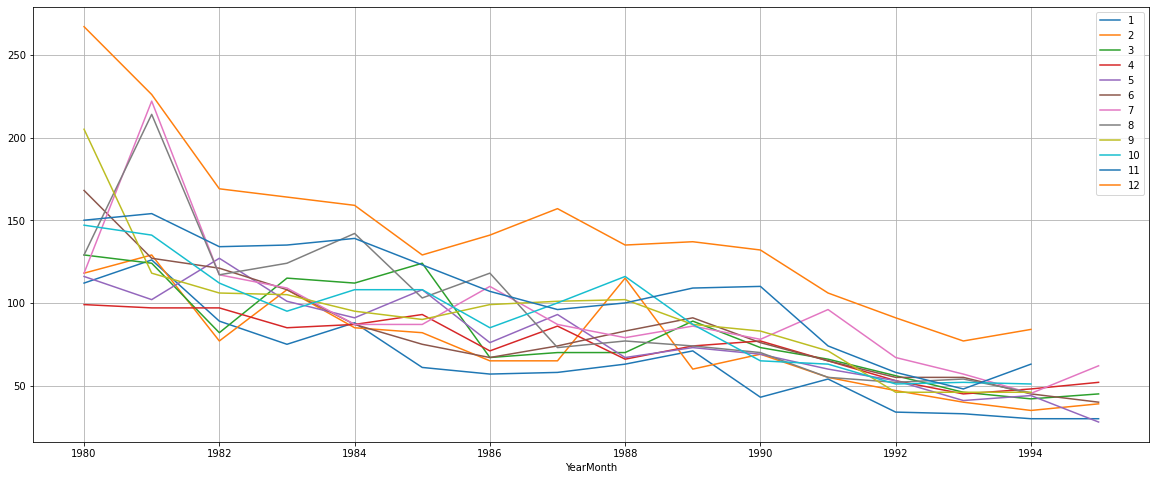

In [43]:
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

#### Plot the Empirical Cumulative Distribution.

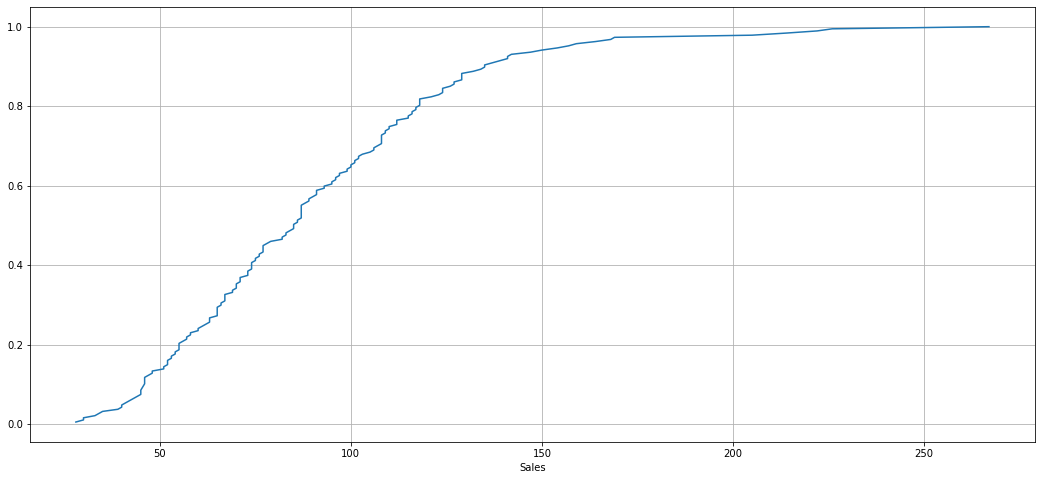

In [44]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(df_imputed['Rose'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sales');

#### Plot the average RoseSales per month and the month on month percentage change of RoseSales.

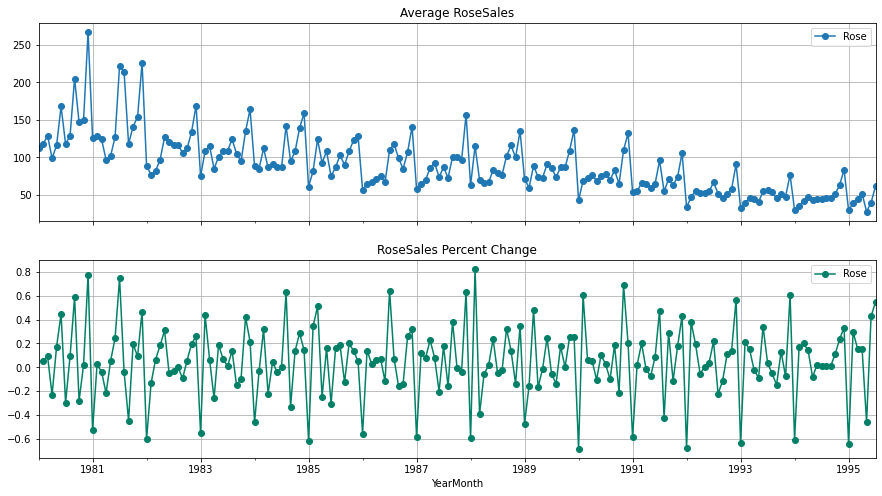

In [45]:
# group by date and get average RetailSales, and precent change
average    = df_imputed.groupby(df_imputed.index)["Rose"].mean()
pct_change = df_imputed.groupby(df_imputed.index)["Rose"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average RoseSales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="RoseSales Percent Change",grid=True)

#### Decompose the Time Series and plot the different components.


In [35]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

##### Additive Decomposition

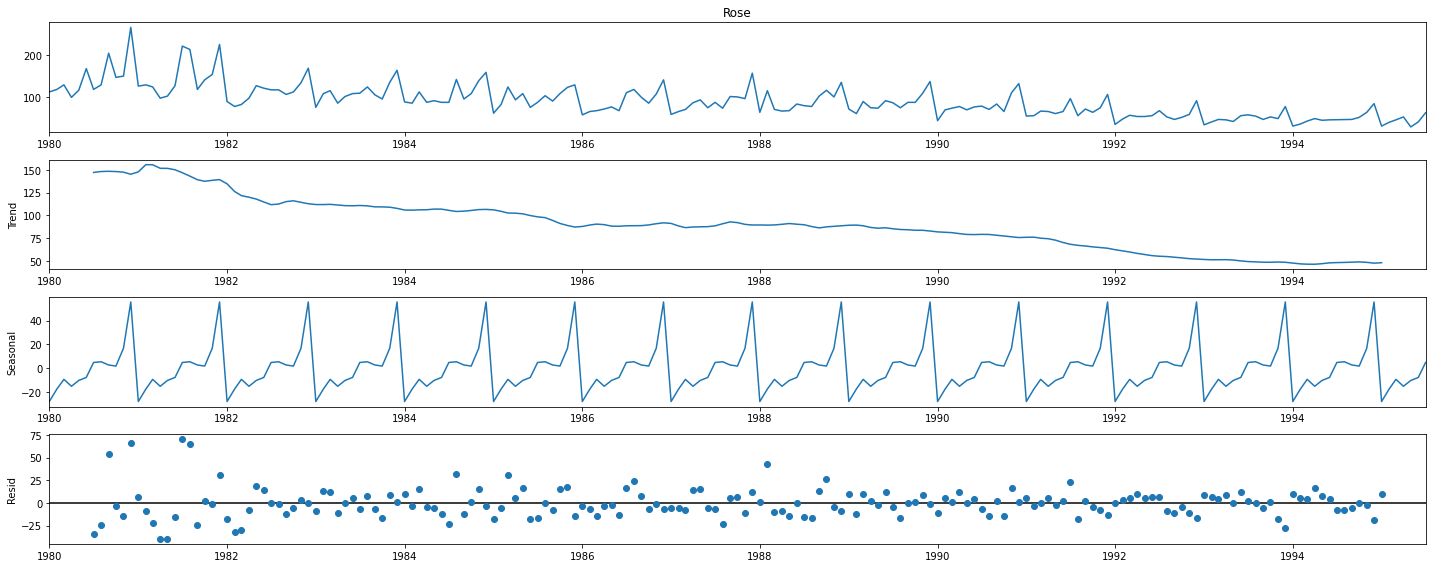

In [46]:
decomposition = seasonal_decompose(df_imputed['Rose'],model='additive')
decomposition.plot();

In [47]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Freq: MS, Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01   -27.908647
1980-02-01   -17.435632
1980-03-01    -9.285830
1980-04-01   -15.098330
1980-05-01   -10.196544
1980-06-01    -7.678687
1980-07-01     4.896908
1980-08-01     5.499686
1980-09-01     2.774686
1980-10-01     1.871908
1980-11-01    16.846908
1980-12-01    55.713575
Freq: MS, Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01          NaN
1980-02-01          NaN
1980-03-01          NaN
1980-04-01          NaN
1980-05-01          NaN
1980-06-01          NaN
1980-07-01   -33.980241
1980-08-01   -24.624686
1980-09-01    53.850314
1980-10-01    -2.955241
1980-11-01   -14.263575
19

##### Multiplicative Decomposition

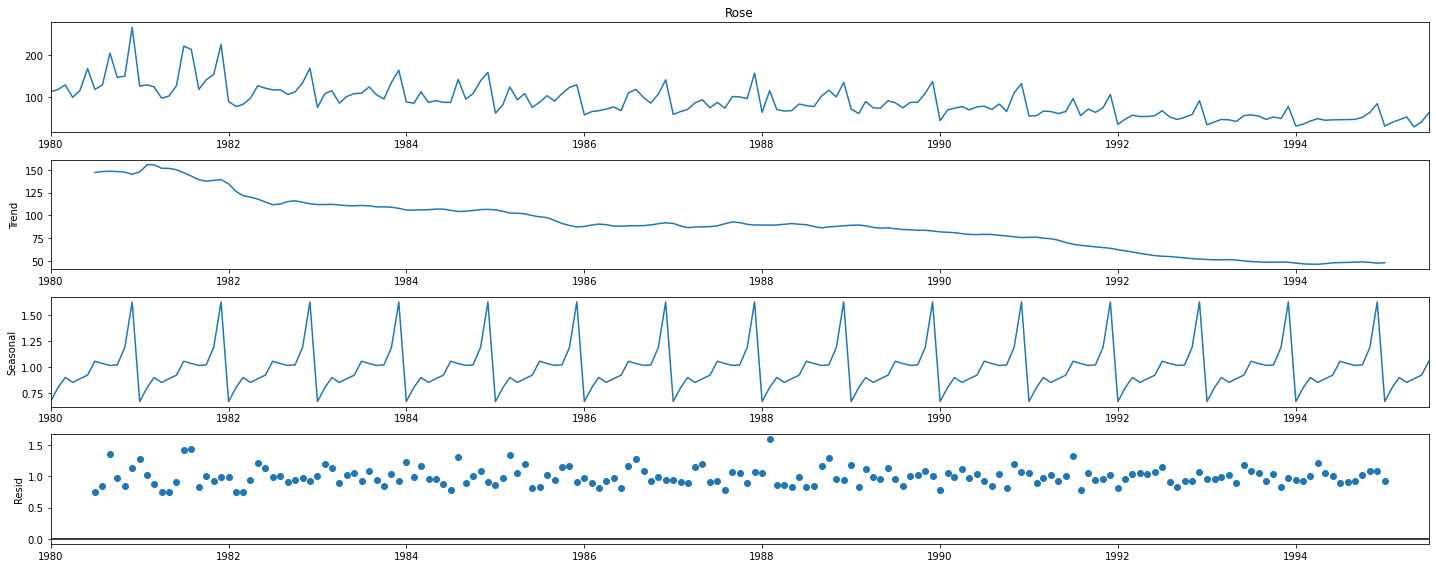

In [48]:
decomposition = seasonal_decompose(df_imputed['Rose'],model='multiplicative')
decomposition.plot();

In [49]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Freq: MS, Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.670111
1980-02-01    0.806163
1980-03-01    0.901164
1980-04-01    0.854024
1980-05-01    0.889415
1980-06-01    0.923985
1980-07-01    1.058038
1980-08-01    1.035881
1980-09-01    1.017648
1980-10-01    1.022573
1980-11-01    1.192349
1980-12-01    1.628646
Freq: MS, Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    0.758258
1980-08-01    0.840720
1980-09-01    1.357674
1980-10-01    0.970771
1980-11-01    0.853378
1980-12-01    1.129646
Fr

#### Check for stationarity of the whole Time Series data.

In [50]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

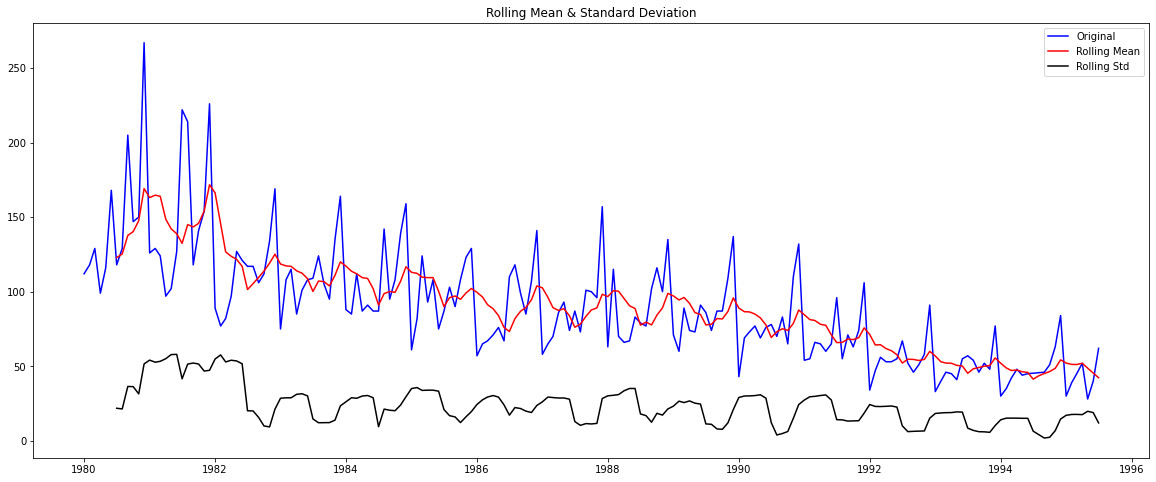

Results of Dickey-Fuller Test:
Test Statistic                  -1.876699
p-value                          0.343101
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [52]:
test_stationarity(df_imputed['Rose'])

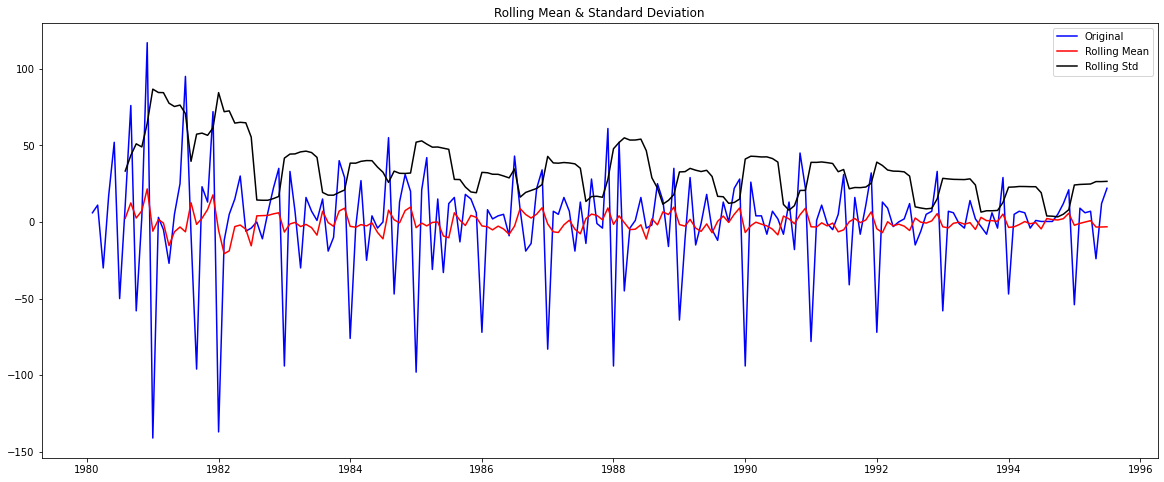

Results of Dickey-Fuller Test:
Test Statistic                -8.044392e+00
p-value                        1.810895e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [53]:
test_stationarity(df_imputed['Rose'].diff().dropna())

#### Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.


In [54]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

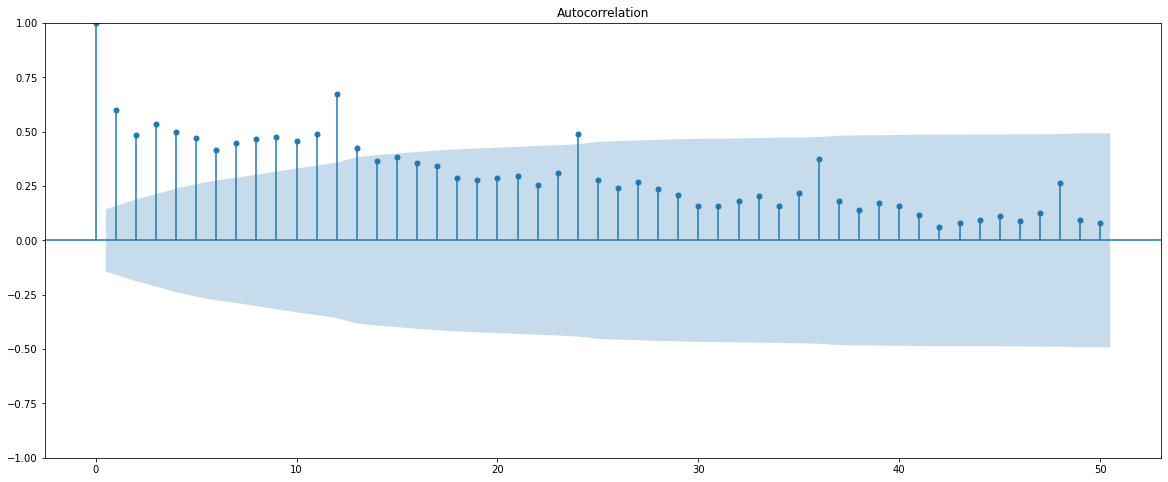

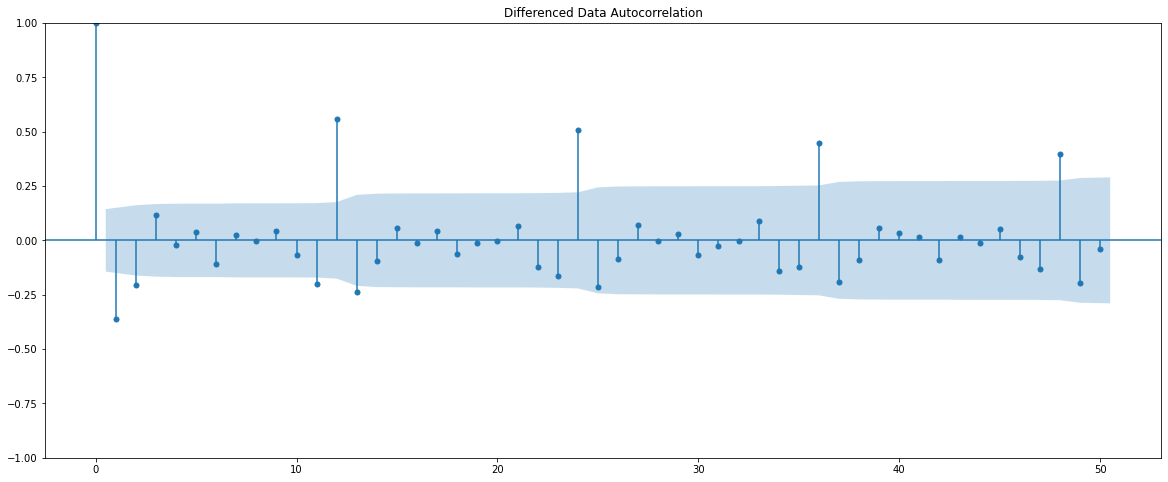

In [55]:
plot_acf(df_imputed['Rose'],lags=50)
plot_acf(df_imputed['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

C:\Users\rakes\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\rakes\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


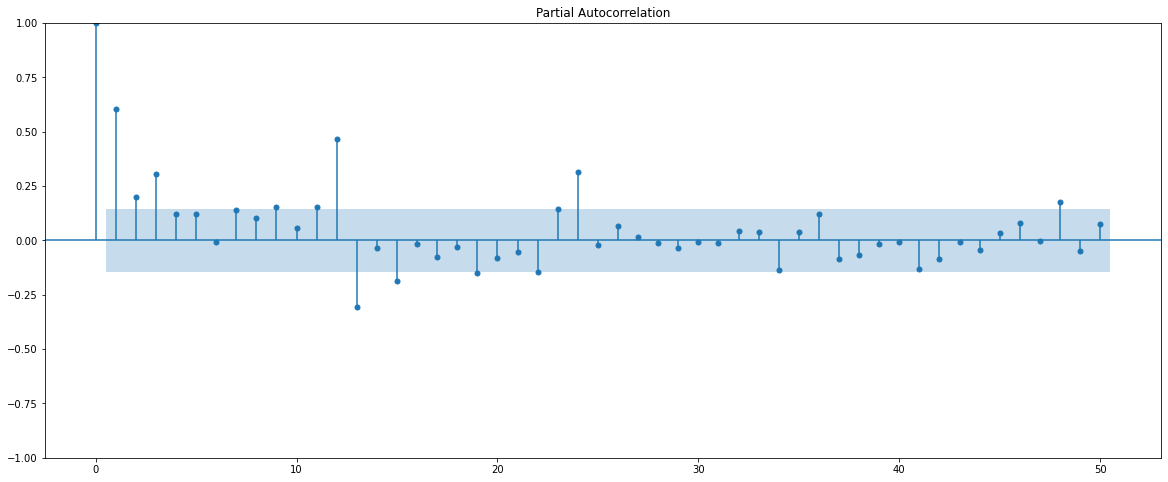

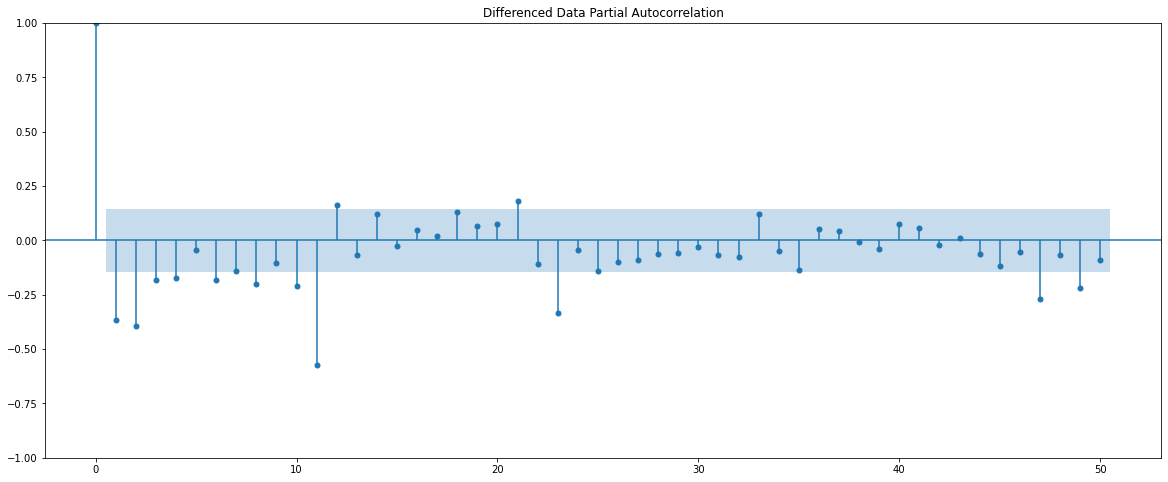

In [56]:
plot_pacf(df_imputed['Rose'],lags=50)
plot_pacf(df_imputed['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

### 3. Split the data into training and test. The test data should start in 1991. 

#### Training Data is till the end of 1990. Test Data is from the beginning of 1991 to the last time stamp provided.

In [57]:
train=df_imputed[df_imputed.index.year < 1991]
test=df_imputed[df_imputed.index.year >= 1991]

In [58]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [59]:
print('First few rows of Training Data')
display(train.head())

print('Last few rows of Training Data')
display(train.tail())

print('First few rows of Test Data')
display(test.head())

print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

Last few rows of Training Data


Rose
YearMonth        
1990-08-01   70.0
1990-09-01   83.0
1990-10-01   65.0
1990-11-01  110.0
1990-12-01  132.0

First few rows of Test Data


Rose
YearMonth       
1991-01-01  54.0
1991-02-01  55.0
1991-03-01  66.0
1991-04-01  65.0
1991-05-01  60.0

Last few rows of Test Data


Rose
YearMonth       
1995-03-01  45.0
1995-04-01  52.0
1995-05-01  28.0
1995-06-01  40.0
1995-07-01  62.0

In [60]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


#### Check for stationarity of the Training Data Time Series.

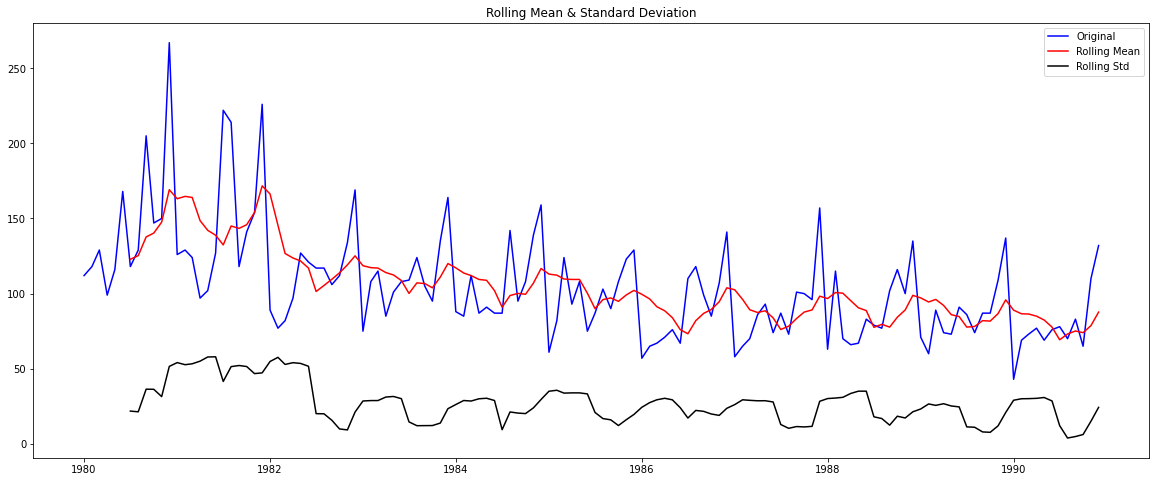

Results of Dickey-Fuller Test:
Test Statistic                  -2.164250
p-value                          0.219476
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



In [61]:
test_stationarity(train['Rose'])

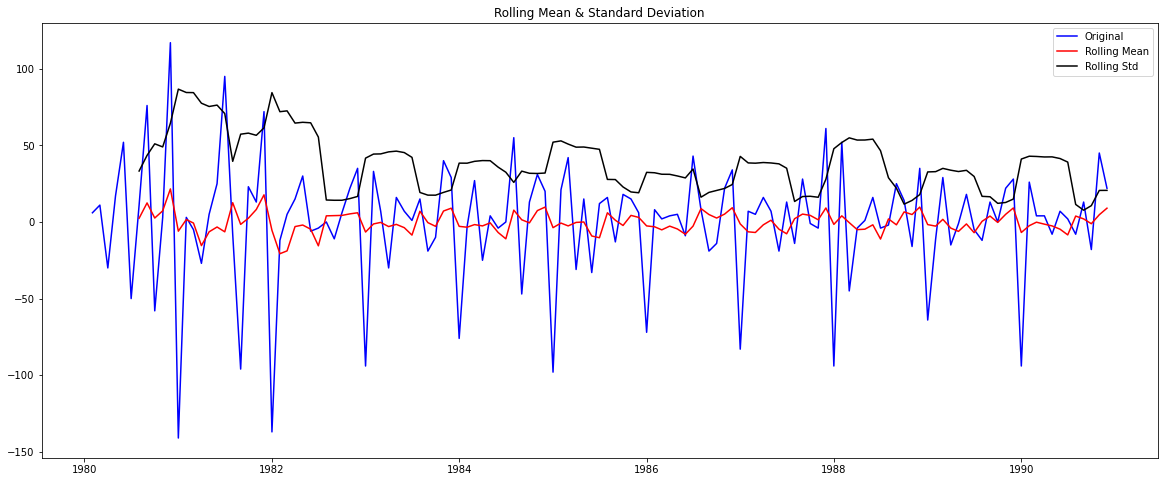

Results of Dickey-Fuller Test:
Test Statistic                -6.592372e+00
p-value                        7.061944e-09
#Lags Used                     1.200000e+01
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64 



In [62]:
test_stationarity(train['Rose'].diff().dropna())

### 4. Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models, simple average models etc. should also be built on the training data and check the performance on the test data using RMSE.

### Method 1: Linear Regression on Time

In [134]:
df1         = df_imputed.copy() # Make a copy
time        = [i+1 for i in range(len(df_imputed))]
df1['time'] = time

df1.head(5)

Rose  time
YearMonth              
1980-01-01  112.0     1
1980-02-01  118.0     2
1980-03-01  129.0     3
1980-04-01   99.0     4
1980-05-01  116.0     5

In [124]:
x_train = train.drop('Rose', axis=1)
x_test  = test.drop('Rose', axis=1)
y_train = train[['Rose']]
y_test  = test[['Rose']]

In [125]:
from sklearn.linear_model import LinearRegression

In [126]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [127]:
x_train, y_train

(            time
 YearMonth       
 1980-01-01     1
 1980-02-01     2
 1980-03-01     3
 1980-04-01     4
 1980-05-01     5
 ...          ...
 1990-08-01   128
 1990-09-01   129
 1990-10-01   130
 1990-11-01   131
 1990-12-01   132
 
 [132 rows x 1 columns],
              Rose
 YearMonth        
 1980-01-01  112.0
 1980-02-01  118.0
 1980-03-01  129.0
 1980-04-01   99.0
 1980-05-01  116.0
 ...           ...
 1990-08-01   70.0
 1990-09-01   83.0
 1990-10-01   65.0
 1990-11-01  110.0
 1990-12-01  132.0
 
 [132 rows x 1 columns])

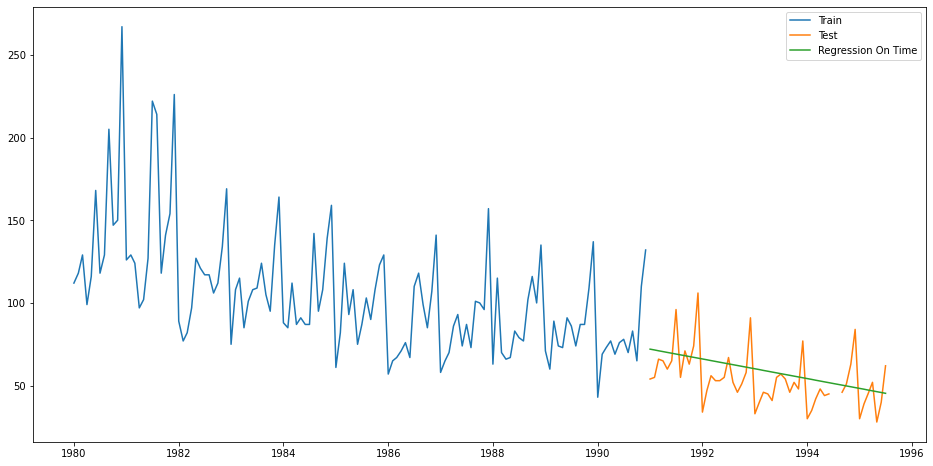

In [128]:
predictions         = model.predict(x_test)
y_test['RegOnTime'] = predictions

plt.figure(figsize=(16,8))
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(y_test['RegOnTime'], label='Regression On Time')
plt.legend(loc='best')

#### Defining the functions for calculating the accuracy metrics.

##### Model Evaluation

In [129]:
from sklearn import metrics

In [133]:
from math  import sqrt
from sklearn.metrics import  mean_squared_error
rmse = sqrt(mean_squared_error(test.Rose, y_test.RegOnTime))
RMSE = round(rmse, 3)
print("For RegressionOnTime,  RMSE is %3.3f " %(RMSE))

For RegressionOnTime,  RMSE is 15.276 


In [224]:
resultsDf = pd.DataFrame({'Method':['Linear Regression'], 'RMSE': [RMSE]})
resultsDf

Method    RMSE
0  Linear Regression  15.276

### Method 2: Naive Approach:  𝑦̂ 𝑡+1=𝑦𝑡 ¶

In [138]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [139]:
train.tail()

Rose  time
YearMonth              
1990-08-01   70.0   128
1990-09-01   83.0   129
1990-10-01   65.0   130
1990-11-01  110.0   131
1990-12-01  132.0   132

In [141]:
NaiveModel_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    132.0
1991-02-01    132.0
1991-03-01    132.0
1991-04-01    132.0
1991-05-01    132.0
Name: naive, dtype: float64

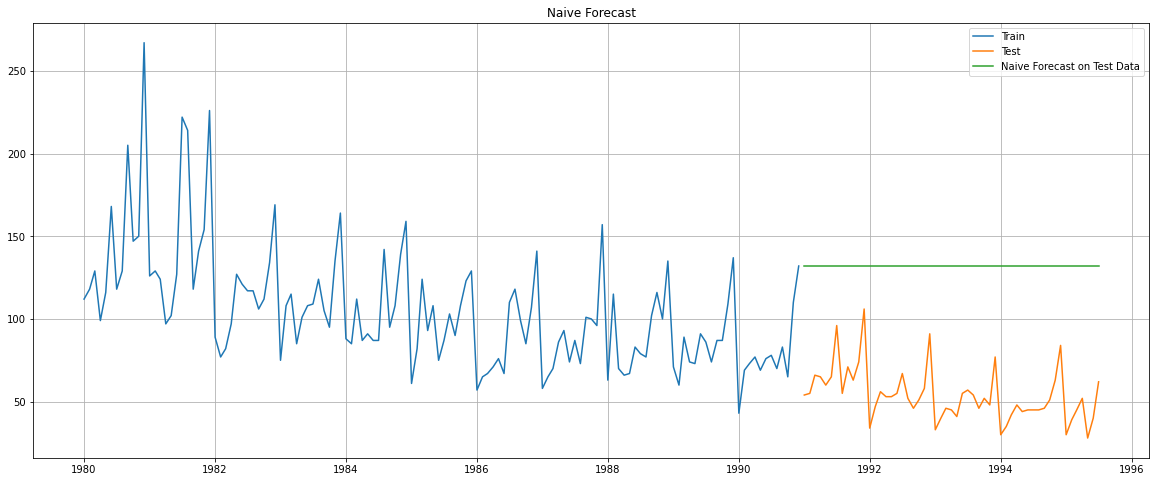

In [142]:
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

##### Model Evaluation


In [143]:
rmse_model2_test = metrics.mean_squared_error(test['Rose'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 79.739


In [225]:
tempResultsDf = pd.DataFrame({'Method':['Naive_model'], 'RMSE': [rmse_model2_test]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

Method      RMSE
0  Linear Regression  15.27600
0        Naive_model  79.73855

### Method 3: Simple Average

In [144]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [146]:
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

Rose  time  mean_forecast
YearMonth                            
1991-01-01  54.0   133     104.939394
1991-02-01  55.0   134     104.939394
1991-03-01  66.0   135     104.939394
1991-04-01  65.0   136     104.939394
1991-05-01  60.0   137     104.939394

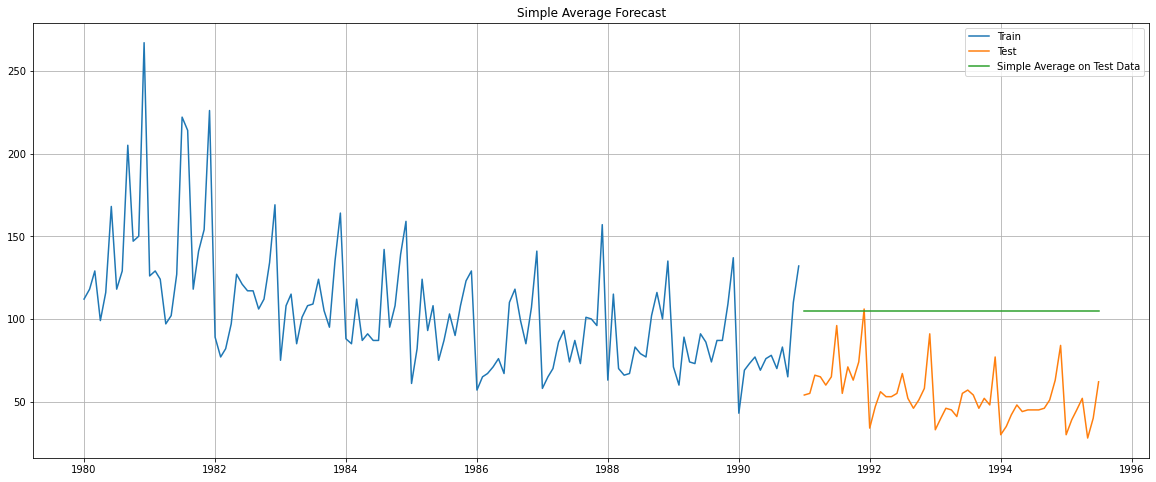

In [147]:
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

##### Model Evaluation

In [148]:
rmse_model3_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 53.481


In [226]:
tempResultsDf = pd.DataFrame({'Method':['Simple Average'], 'RMSE': [rmse_model3_test]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

Method       RMSE
0  Linear Regression  15.276000
0        Naive_model  79.738550
0     Simple Average  53.480857

In [176]:
resultsDf

Method       RMSE
0  RegressionOnTime  15.276000
0       Naive_model  79.738550
0    Simple Average  53.480857

### Method 4: Moving Average(MA)

In [149]:
MovingAverage = df_imputed.copy()
MovingAverage.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

In [180]:
df1['moving_avg_forecast_4']  = df_imputed['Rose'].rolling(4).mean()
df1['moving_avg_forecast_6']  = df_imputed['Rose'].rolling(6).mean()
df1['moving_avg_forecast_8']  = df_imputed['Rose'].rolling(8).mean()
df1['moving_avg_forecast_12'] = df_imputed['Rose'].rolling(12).mean()

For Moving Average model, moving_avg_forecast_4  RMSE is 14.411
For Moving Average model, moving_avg_forecast_6  RMSE is 14.503
For Moving Average model, moving_avg_forecast_8  RMSE is 14.811
For Moving Average model, moving_avg_forecast_12  RMSE is 15.271


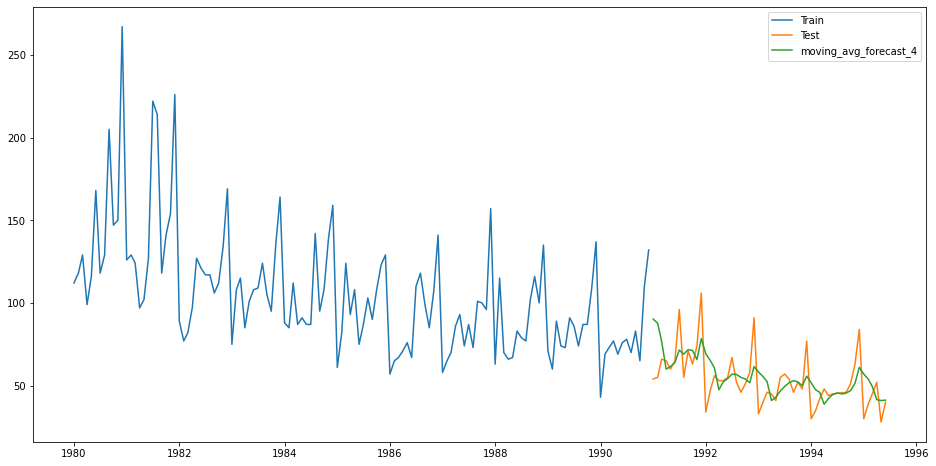

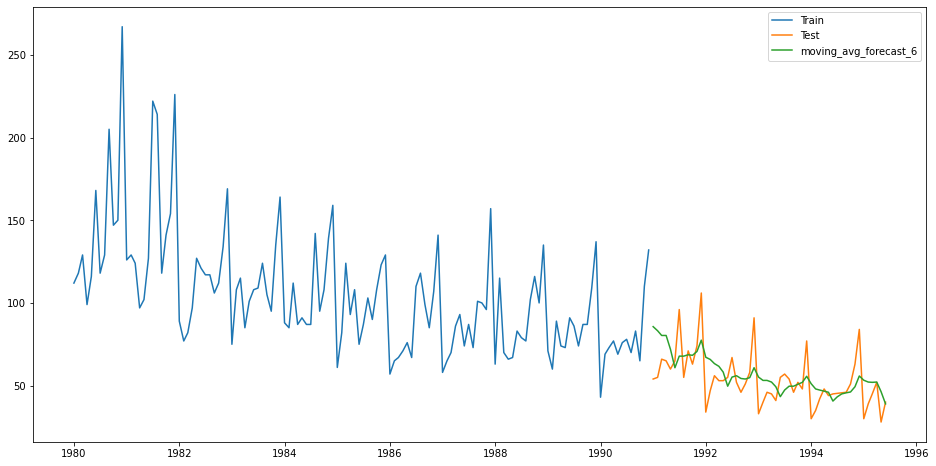

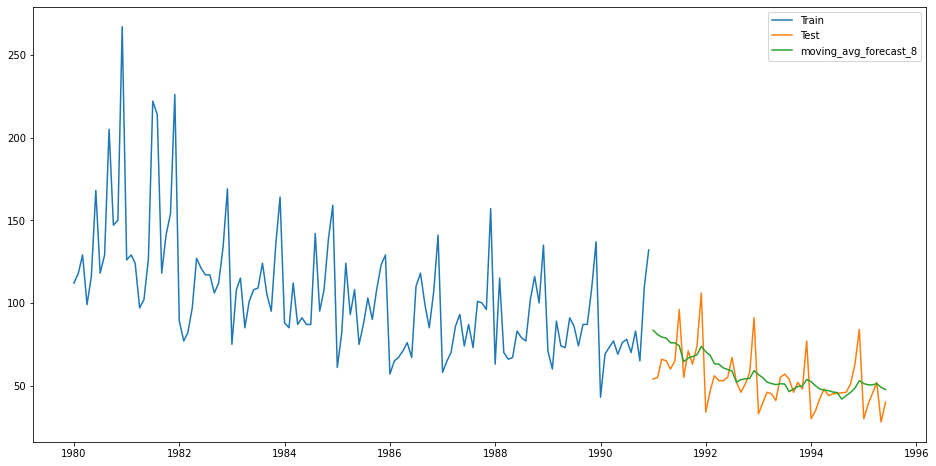

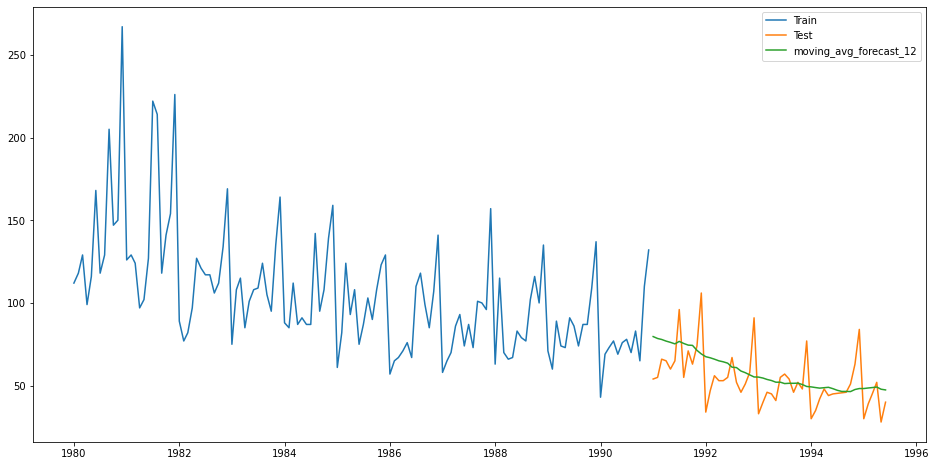

In [194]:
cols = ['moving_avg_forecast_4','moving_avg_forecast_6','moving_avg_forecast_8','moving_avg_forecast_12']


train=df1[df1.index.year < 1991]
test=df1[df1.index.year >= 1991]

y_hat_avg = test.copy()

plt.figure(figsize=(16,8))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast_4'], label = 'moving_avg_forecast_4')
plt.legend(loc = 'best')
rmse_mov_avg_4 = sqrt(mean_squared_error(test.Rose, y_hat_avg['moving_avg_forecast_4']))
rmse_mov_avg_4 = round(rmse_mov_avg_4, 3)

plt.figure(figsize=(16,8))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast_6'], label = 'moving_avg_forecast_6')
plt.legend(loc = 'best')
rmse_mov_avg_6 = sqrt(mean_squared_error(test.Rose, y_hat_avg['moving_avg_forecast_6']))
rmse_mov_avg_6 = round(rmse_mov_avg_6, 3)

plt.figure(figsize=(16,8))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast_8'], label = 'moving_avg_forecast_8')
plt.legend(loc = 'best')
rmse_mov_avg_8 = sqrt(mean_squared_error(test.Rose, y_hat_avg['moving_avg_forecast_8']))
rmse_mov_avg_8 = round(rmse_mov_avg_8, 3)

plt.figure(figsize=(16,8))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast_12'], label = 'moving_avg_forecast_12')
plt.legend(loc = 'best')
rmse_mov_avg_12 = sqrt(mean_squared_error(test.Rose, y_hat_avg['moving_avg_forecast_12']))
rmse_mov_avg_12 = round(rmse_mov_avg_12, 3)



print("For Moving Average model, %s  RMSE is %3.3f" %('moving_avg_forecast_4', rmse_mov_avg_4))

print("For Moving Average model, %s  RMSE is %3.3f" %('moving_avg_forecast_6', rmse_mov_avg_6))

print("For Moving Average model, %s  RMSE is %3.3f" %('moving_avg_forecast_8', rmse_mov_avg_8))

print("For Moving Average model, %s  RMSE is %3.3f" %('moving_avg_forecast_12', rmse_mov_avg_12))

In [227]:
    tempResultsDf = pd.DataFrame({'Method':['moving_avg_forecast_4'], 'RMSE': [rmse_mov_avg_4]})
    resultsDf = pd.concat([resultsDf, tempResultsDf])
    resultsDf

Method       RMSE
0      Linear Regression  15.276000
0            Naive_model  79.738550
0         Simple Average  53.480857
0  moving_avg_forecast_4  14.411000

In [228]:
    tempResultsDf = pd.DataFrame({'Method':['moving_avg_forecast_6'], 'RMSE': [rmse_mov_avg_6]})
    resultsDf = pd.concat([resultsDf, tempResultsDf])
    resultsDf

Method       RMSE
0      Linear Regression  15.276000
0            Naive_model  79.738550
0         Simple Average  53.480857
0  moving_avg_forecast_4  14.411000
0  moving_avg_forecast_6  14.503000

In [229]:
    tempResultsDf = pd.DataFrame({'Method':['moving_avg_forecast_8'], 'RMSE': [rmse_mov_avg_8]})
    resultsDf = pd.concat([resultsDf, tempResultsDf])
    resultsDf

Method       RMSE
0      Linear Regression  15.276000
0            Naive_model  79.738550
0         Simple Average  53.480857
0  moving_avg_forecast_4  14.411000
0  moving_avg_forecast_6  14.503000
0  moving_avg_forecast_8  14.811000

In [230]:
    tempResultsDf = pd.DataFrame({'Method':['moving_avg_forecast_12'], 'RMSE': [rmse_mov_avg_12]})
    resultsDf = pd.concat([resultsDf, tempResultsDf])
    resultsDf

Method       RMSE
0       Linear Regression  15.276000
0             Naive_model  79.738550
0          Simple Average  53.480857
0   moving_avg_forecast_4  14.411000
0   moving_avg_forecast_6  14.503000
0   moving_avg_forecast_8  14.811000
0  moving_avg_forecast_12  15.271000

In [201]:

# resultsDf.drop(index=0,inplace=True)

### Method 5: Simple Exponential Smoothing


In [155]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [156]:
model = SimpleExpSmoothing(train['Rose'])

In [157]:
model_fit = model.fit(optimized = True)

In [158]:
print('')
print('== Simple Exponential Smoothing Parameters == ')
print('')

print('')
print('Smoothing Level', np.round(model_fit.params['smoothing_level'], 4))
print('Initial Level',   np.round(model_fit.params['initial_level'], 4))
print('')


== Simple Exponential Smoothing Parameters == 


Smoothing Level 0.0987
Initial Level 134.3872



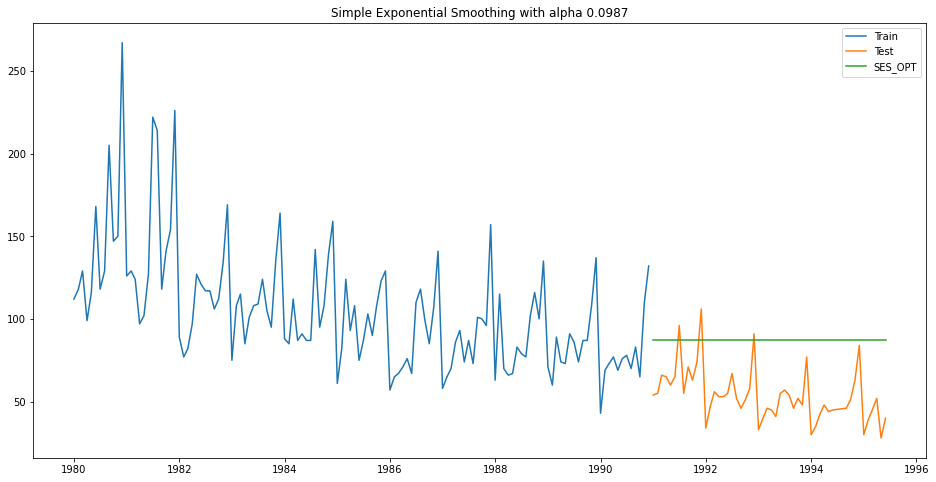

In [159]:
y_hat_avg['SES']     = model_fit.forecast(len(test['Rose']))

alpha_value          = np.round(model_fit.params['smoothing_level'], 4)


plt.figure(figsize=(16,8))
plt.plot(train.index, train['Rose'], label = 'Train')
plt.plot(test.index, test['Rose'],   label = 'Test')
plt.plot(test.index, y_hat_avg.SES,   label = 'SES_OPT')
plt.title('Simple Exponential Smoothing with alpha ' + str(alpha_value))
plt.legend(loc='best') 
plt.show()

In [160]:
rmse_opt =  np.sqrt(mean_squared_error(test['Rose'], y_hat_avg.SES))

print("For alpha = %1.2f,  RMSE is %3.4f " %(alpha_value, rmse_opt))

For alpha = 0.10,  RMSE is 36.9779 


In [231]:
tempResultsDf = pd.DataFrame({'Method': 'Simple Exp Smoothing', 'RMSE': [rmse_opt]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

Method       RMSE
0       Linear Regression  15.276000
0             Naive_model  79.738550
0          Simple Average  53.480857
0   moving_avg_forecast_4  14.411000
0   moving_avg_forecast_6  14.503000
0   moving_avg_forecast_8  14.811000
0  moving_avg_forecast_12  15.271000
0    Simple Exp Smoothing  36.977889

### Method 6: Holt's Linear Trend Method (Double Exponential Smoothing)

In [210]:
import statsmodels.api as sm

In [211]:
y_hat_avg = test.copy()

In [212]:
model_fit = Holt(np.asarray(train['Rose'])).fit()

In [214]:
y_hat_avg['Holt_linear'] = model_fit.forecast(len(test))

In [215]:
print('')
print('== Simple Exponential Smoothing Parameters == ')
print('')

print('')
print('Smoothing Level', np.round(model_fit.params['smoothing_level'], 4))
print('Initial Level',   np.round(model_fit.params['initial_level'], 4))
print('')


== Simple Exponential Smoothing Parameters == 


Smoothing Level 0.0175
Initial Level 138.8208



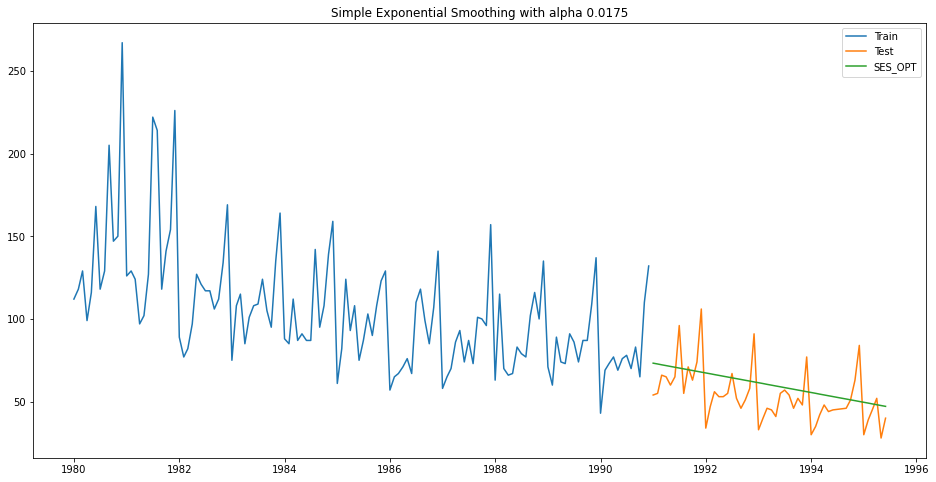

In [216]:
y_hat_avg['SES']     = model_fit.forecast(len(test['Rose']))

alpha_value          = np.round(model_fit.params['smoothing_level'], 4)


plt.figure(figsize=(16,8))
plt.plot(train.index, train['Rose'], label = 'Train')
plt.plot(test.index, test['Rose'],   label = 'Test')
plt.plot(test.index, y_hat_avg.SES,   label = 'SES_OPT')
plt.title('Simple Exponential Smoothing with alpha ' + str(alpha_value))
plt.legend(loc='best') 
plt.show()

In [218]:
rmse_opt_double =  np.sqrt(mean_squared_error(test['Rose'], y_hat_avg.SES))

print("For alpha = %1.2f,  RMSE is %3.4f " %(alpha_value, rmse_opt_double))

For alpha = 0.02,  RMSE is 15.7138 


In [232]:
tempResultsDf = pd.DataFrame({'Method': "Holt's Linear Trend", 'RMSE': [rmse_opt_double]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

Method       RMSE
0       Linear Regression  15.276000
0             Naive_model  79.738550
0          Simple Average  53.480857
0   moving_avg_forecast_4  14.411000
0   moving_avg_forecast_6  14.503000
0   moving_avg_forecast_8  14.811000
0  moving_avg_forecast_12  15.271000
0    Simple Exp Smoothing  36.977889
0     Holt's Linear Trend  15.713774

### Method 7: Holt-Winters Method - Additive seasonality

In [233]:
y_hat_avg = test.copy()

In [235]:
model_fit = ExponentialSmoothing(np.asarray(train['Rose']) ,seasonal_periods = 12 ,trend='add', seasonal='add').fit()

In [236]:
y_hat_avg['Holt_Winter'] = model_fit.forecast(len(test))

In [239]:
print('')
print('== Holt-Winters Additive ETS(A,A,A) Parameters ==')
print('')
alpha_value = np.round(model_fit.params['smoothing_level'], 4)
beta_value  = np.round(model_fit.params['smoothing_trend'], 4)
gamma_value = np.round(model_fit.params['smoothing_seasonal'], 4) 

print('Smoothing Level: ', alpha_value)
print('Smoothing Slope: ', beta_value)
print('Smoothing Seasonal: ', gamma_value)
print('Initial Level: ', np.round(model_fit.params['initial_level'], 4))
print('Initial Slope: ', np.round(model_fit.params['initial_trend'], 4))
print('Initial Seasons: ', np.round(model_fit.params['initial_seasons'], 4))
print('')


== Holt-Winters Additive ETS(A,A,A) Parameters ==

Smoothing Level:  0.0895
Smoothing Slope:  0.0002
Smoothing Seasonal:  0.0035
Initial Level:  146.557
Initial Slope:  -0.5472
Initial Seasons:  [-31.1748 -18.7484 -10.7696 -21.3674 -12.6378  -7.2743   2.6128   8.696
   4.7938   2.9611  21.0574  63.1828]



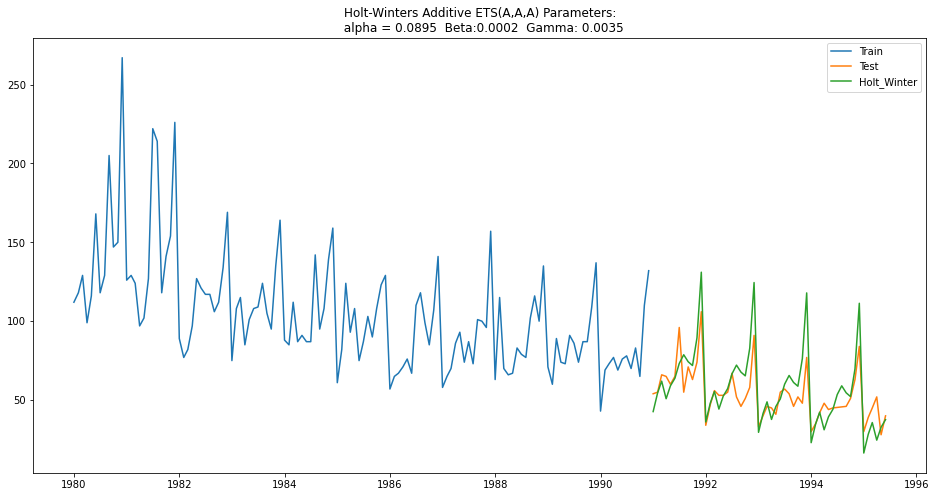

In [240]:
plt.figure(figsize=(16,8))
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.title('Holt-Winters Additive ETS(A,A,A) Parameters:\n  alpha = ' + 
          str(alpha_value) + '  Beta:' + 
          str(beta_value) +
          '  Gamma: ' + str(gamma_value))
plt.legend(loc='best')

In [241]:
rmse_opt_holt_winter =  np.sqrt(mean_squared_error(test['Rose'], y_hat_avg['Holt_Winter']))

print("For Holt Winter alpha = %1.2f, beta = %1.2f, gamma = %1.2f, RMSE is %3.4f" %(alpha_value, beta_value, gamma_value, rmse_opt_holt_winter))

For Holt Winter alpha = 0.09, beta = 0.00, gamma = 0.00, RMSE is 14.2340


In [242]:
tempResultsDf = pd.DataFrame({'Method': 'Holt_Winter', 'RMSE': [rmse_opt_holt_winter]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

Method       RMSE
0       Linear Regression  15.276000
0             Naive_model  79.738550
0          Simple Average  53.480857
0   moving_avg_forecast_4  14.411000
0   moving_avg_forecast_6  14.503000
0   moving_avg_forecast_8  14.811000
0  moving_avg_forecast_12  15.271000
0    Simple Exp Smoothing  36.977889
0     Holt's Linear Trend  15.713774
0             Holt_Winter  14.233988

### Method 8: Holt-Winters Method - Multiplicative Model


In [243]:
y_hat_avg = test.copy()

In [244]:
model_fit = ExponentialSmoothing(np.asarray(train['Rose']) ,seasonal_periods = 12 ,trend='add', seasonal='Multiplicative').fit()

In [246]:
y_hat_avg['Holt_Winter_Mul'] = model_fit.forecast(len(test))

In [248]:
print('')
print('== Holt-Winters Multiplicative ETS(A,A,M) Parameters ==')
print('')
alpha_value = np.round(model_fit.params['smoothing_level'], 4)
beta_value  = np.round(model_fit.params['smoothing_trend'], 4)
gamma_value = np.round(model_fit.params['smoothing_seasonal'], 4) 

print('Smoothing Level: ', alpha_value)
print('Smoothing Slope: ', beta_value)
print('Smoothing Seasonal: ', gamma_value)
print('Initial Level: ', np.round(model_fit.params['initial_level'], 4))
print('Initial Slope: ', np.round(model_fit.params['initial_trend'], 4))
print('Initial Seasons: ', np.round(model_fit.params['initial_seasons'], 4))
print('')


== Holt-Winters Multiplicative ETS(A,A,M) Parameters ==

Smoothing Level:  0.0715
Smoothing Slope:  0.0453
Smoothing Seasonal:  0.0001
Initial Level:  130.4084
Initial Slope:  -0.7799
Initial Seasons:  [0.8622 0.9777 1.0688 0.934  1.0506 1.1441 1.2584 1.3394 1.2678 1.2413
 1.4472 1.9955]



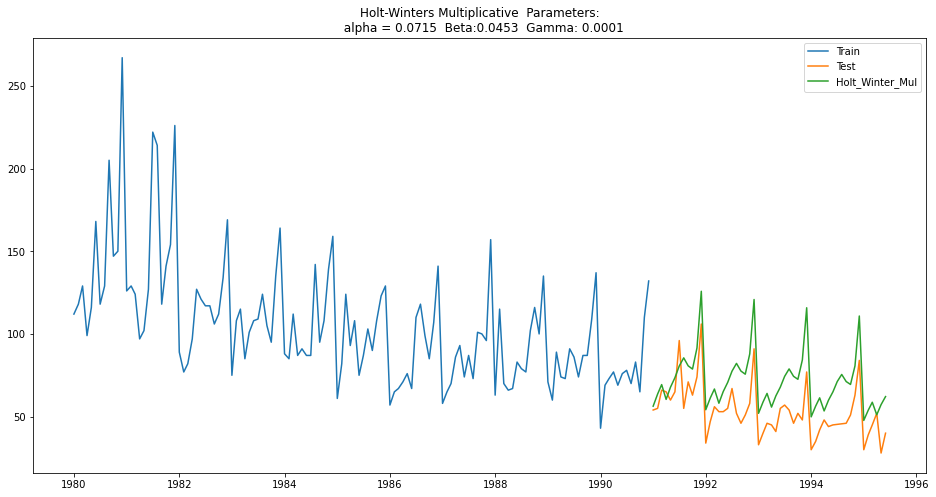

In [249]:
plt.figure(figsize=(16,8))
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(y_hat_avg['Holt_Winter_Mul'], label='Holt_Winter_Mul')
plt.title('Holt-Winters Multiplicative  Parameters:\n  alpha = ' + 
          str(alpha_value) + '  Beta:' + 
          str(beta_value) +
          '  Gamma: ' + str(gamma_value))
plt.legend(loc='best')

In [251]:
rmse_opt_holt_mul =  np.sqrt(mean_squared_error(test['Rose'], y_hat_avg['Holt_Winter_Mul']))

print("For alpha = %1.2f, beta = %1.2f, gamma = %1.2f, RMSE is %3.4f" %(alpha_value, beta_value, gamma_value, rmse_opt_holt_mul))

For alpha = 0.07, beta = 0.05, gamma = 0.00, RMSE is 20.3258


In [252]:
tempResultsDf = pd.DataFrame({'Method': 'Holt_Winter Mul', 'RMSE': [rmse_opt_holt_mul]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

Method       RMSE
0       Linear Regression  15.276000
0             Naive_model  79.738550
0          Simple Average  53.480857
0   moving_avg_forecast_4  14.411000
0   moving_avg_forecast_6  14.503000
0   moving_avg_forecast_8  14.811000
0  moving_avg_forecast_12  15.271000
0    Simple Exp Smoothing  36.977889
0     Holt's Linear Trend  15.713774
0             Holt_Winter  14.233988
0         Holt_Winter Mul  20.325808

### 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

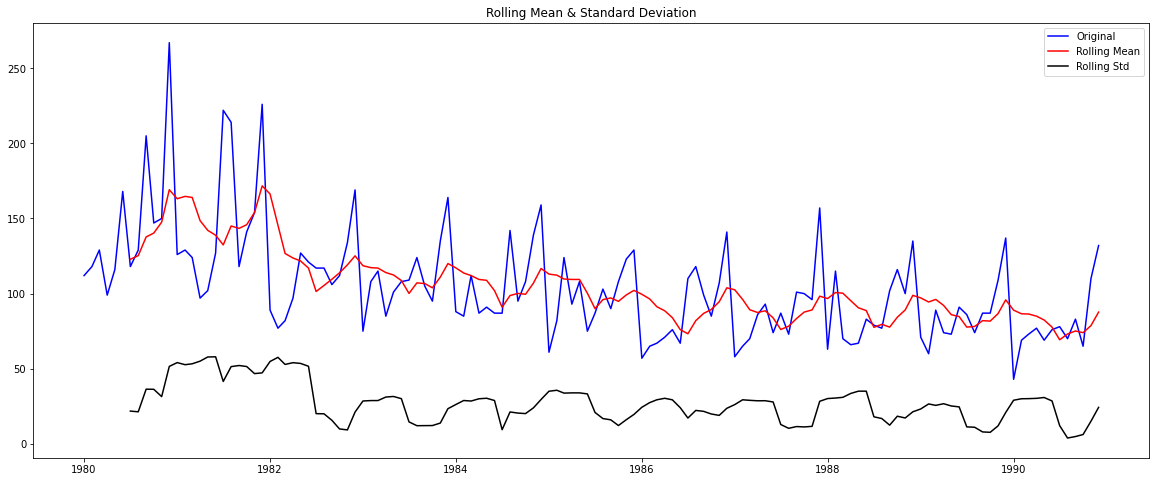

Results of Dickey-Fuller Test:
Test Statistic                  -2.164250
p-value                          0.219476
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



In [253]:
test_stationarity(train['Rose'])

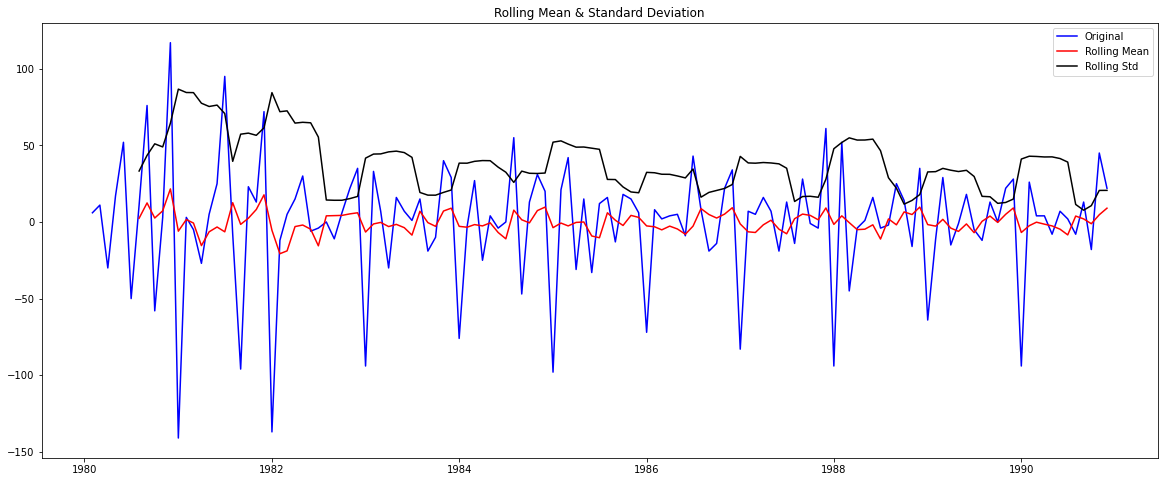

Results of Dickey-Fuller Test:
Test Statistic                -6.592372e+00
p-value                        7.061944e-09
#Lags Used                     1.200000e+01
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64 



In [254]:
test_stationarity(train['Rose'].diff().dropna())

In [255]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-01 to 1990-12-01
Freq: MS
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rose                    132 non-null    float64
 1   time                    132 non-null    int64  
 2   moving_avg_forecast_4   129 non-null    float64
 3   moving_avg_forecast_6   127 non-null    float64
 4   moving_avg_forecast_8   125 non-null    float64
 5   moving_avg_forecast_12  121 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 7.2 KB


### 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

#### Method 9: Auto ARIMA Model

In [258]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 6)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (0, 1, 4)
Model: (0, 1, 5)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (1, 1, 4)
Model: (1, 1, 5)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (2, 1, 4)
Model: (2, 1, 5)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)
Model: (3, 1, 4)
Model: (3, 1, 5)
Model: (4, 1, 0)
Model: (4, 1, 1)
Model: (4, 1, 2)
Model: (4, 1, 3)
Model: (4, 1, 4)
Model: (4, 1, 5)
Model: (5, 1, 0)
Model: (5, 1, 1)
Model: (5, 1, 2)
Model: (5, 1, 3)
Model: (5, 1, 4)
Model: (5, 1, 5)


In [259]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [276]:
from statsmodels.tsa.arima.model import ARIMA

import warnings

warnings.filterwarnings("ignore")

In [275]:
for param in pdq:
    ARIMA_model = ARIMA(train['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)  

ARIMA(0, 1, 0) - AIC:1333.1546729124348
ARIMA(0, 1, 1) - AIC:1282.3098319748312
ARIMA(0, 1, 2) - AIC:1279.6715288535806
ARIMA(0, 1, 3) - AIC:1280.5453761734655
ARIMA(0, 1, 4) - AIC:1281.676698214394
ARIMA(0, 1, 5) - AIC:1283.663514775406
ARIMA(1, 1, 0) - AIC:1317.3503105381492
ARIMA(1, 1, 1) - AIC:1280.5742295380064
ARIMA(1, 1, 2) - AIC:1279.8707234231922
ARIMA(1, 1, 3) - AIC:1281.8707223309998
ARIMA(1, 1, 4) - AIC:1279.6052615306653
ARIMA(1, 1, 5) - AIC:1283.3103338214128
ARIMA(2, 1, 0) - AIC:1298.6110341605004
ARIMA(2, 1, 1) - AIC:1281.5078621868543
ARIMA(2, 1, 2) - AIC:1281.8707222264356
ARIMA(2, 1, 3) - AIC:1274.6954123405285
ARIMA(2, 1, 4) - AIC:1278.770689238292
ARIMA(2, 1, 5) - AIC:1287.6690445210284
ARIMA(3, 1, 0) - AIC:1297.4810917271739
ARIMA(3, 1, 1) - AIC:1282.4192776271989
ARIMA(3, 1, 2) - AIC:1283.720740597716
ARIMA(3, 1, 3) - AIC:1278.6679167115944
ARIMA(3, 1, 4) - AIC:1287.7190768575308
ARIMA(3, 1, 5) - AIC:1276.33592880161
ARIMA(4, 1, 0) - AIC:1296.326656900442
ARIMA(4

In [277]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
29  (4, 1, 5)  1272.699094
65  (4, 1, 5)  1272.699094
51  (2, 1, 3)  1274.695412
15  (2, 1, 3)  1274.695412
33  (5, 1, 3)  1275.835307
..        ...          ...
48  (2, 1, 0)  1298.611034
42  (1, 1, 0)  1317.350311
6   (1, 1, 0)  1317.350311
36  (0, 1, 0)  1333.154673
0   (0, 1, 0)  1333.154673

[72 rows x 2 columns]

In [284]:
auto_ARIMA = ARIMA(train['Rose'], order=(4, 1, 5))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(4, 1, 5)   Log Likelihood                -626.350
Date:                Thu, 22 Dec 2022   AIC                           1272.699
Time:                        16:07:10   BIC                           1301.451
Sample:                    01-01-1980   HQIC                          1284.382
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7218      0.764      2.253      0.024       0.224       3.220
ar.L2          0.0117      2.053      0.006      0.995      -4.012       4.036
ar.L3         -1.7251      2.025     -0.852      0.3

In [285]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [286]:
rmse_auto_arima = mean_squared_error(test['Rose'],predicted_auto_ARIMA,squared=False)
print('RMSE:',rmse_auto_arima)

RMSE: 31.945981131122554


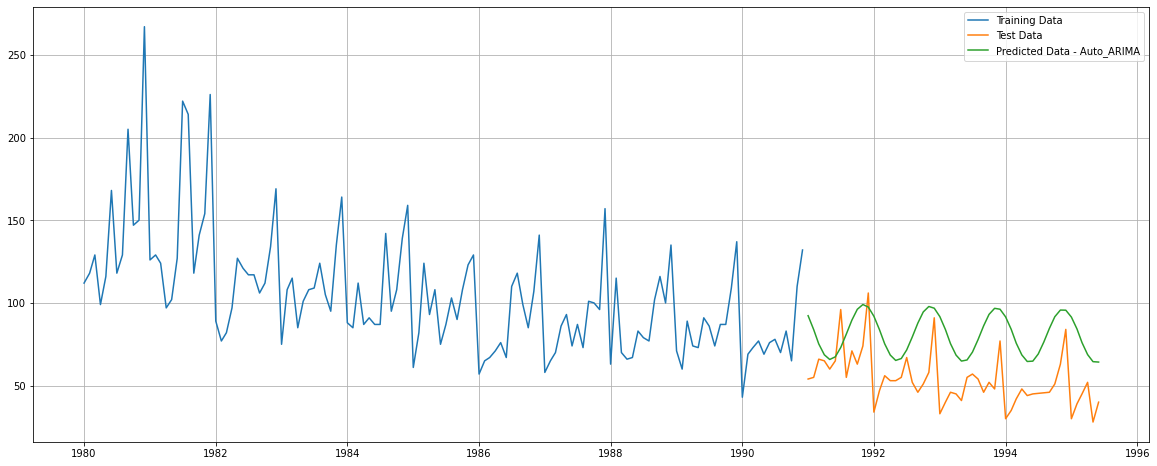

In [287]:
plt.plot(train['Rose'],label='Training Data')
plt.plot(test['Rose'],label='Test Data')
plt.plot(test.index,predicted_auto_ARIMA,label='Predicted Data - Auto_ARIMA')
plt.legend(loc='best')
plt.grid();

In [288]:
tempResultsDf = pd.DataFrame({'Method': ['AUTO_ARIMA(4, 1, 5)'],'RMSE': [rmse_auto_arima]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

Method       RMSE
0       Linear Regression  15.276000
0             Naive_model  79.738550
0          Simple Average  53.480857
0   moving_avg_forecast_4  14.411000
0   moving_avg_forecast_6  14.503000
0   moving_avg_forecast_8  14.811000
0  moving_avg_forecast_12  15.271000
0    Simple Exp Smoothing  36.977889
0     Holt's Linear Trend  15.713774
0             Holt_Winter  14.233988
0         Holt_Winter Mul  20.325808
0     AUTO_ARIMA(4, 1, 5)  31.945981

### 7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

#### Method 10: Manual ARIMA Model

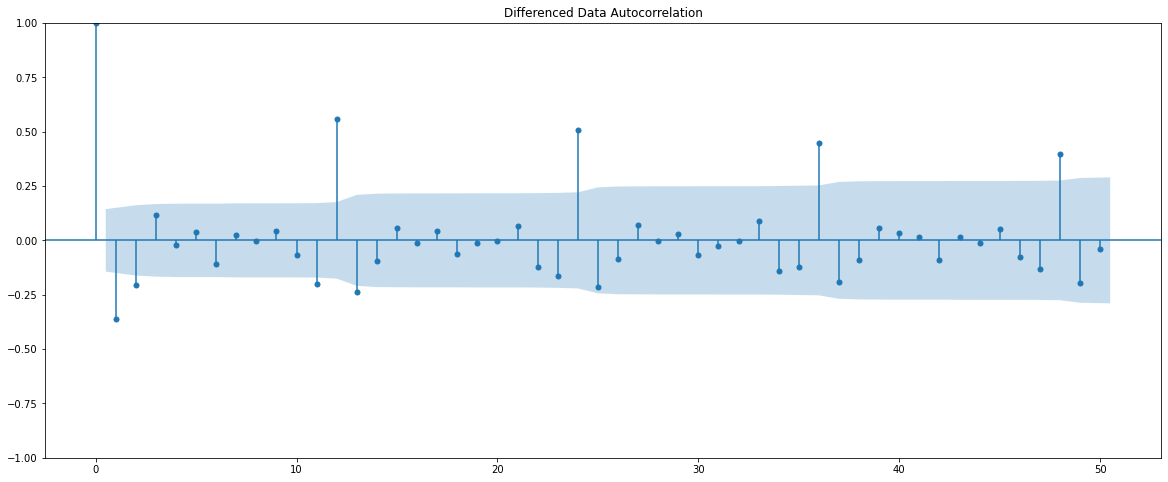

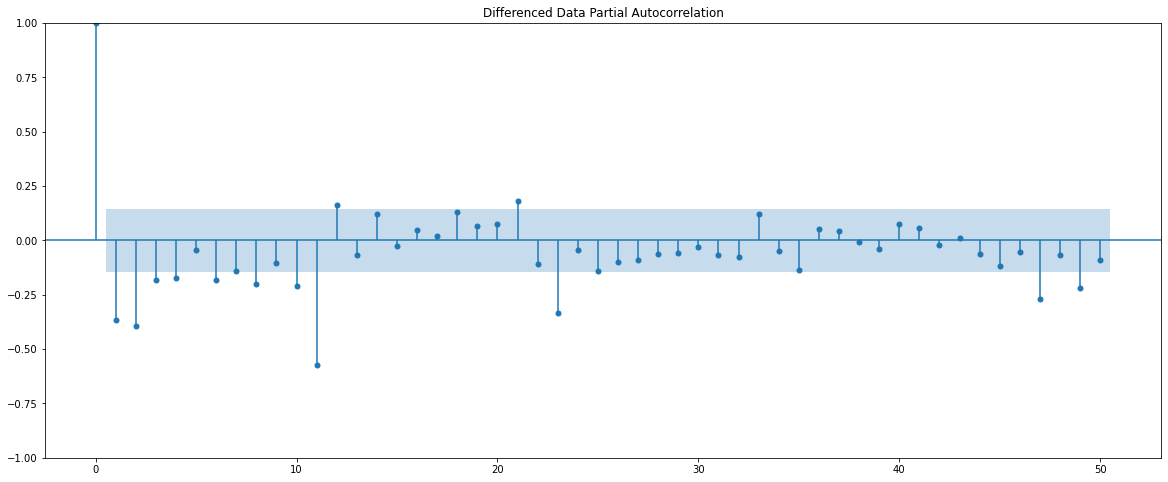

In [289]:
plot_acf(df_imputed['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df_imputed['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [294]:
manual_ARIMA = ARIMA(train['Rose'], order=(4,1,5))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(4, 1, 5)   Log Likelihood                -626.350
Date:                Thu, 22 Dec 2022   AIC                           1272.699
Time:                        16:42:18   BIC                           1301.451
Sample:                    01-01-1980   HQIC                          1284.382
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7218      0.764      2.253      0.024       0.224       3.220
ar.L2          0.0117      2.053      0.006      0.995      -4.012       4.036
ar.L3         -1.7251      2.025     -0.852      0.3

In [295]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [296]:
rmse_manual_arima = mean_squared_error(test['Rose'],predicted_manual_ARIMA,squared=False)
print('RMSE:',rmse_manual_arima)

RMSE: 31.945981131122554


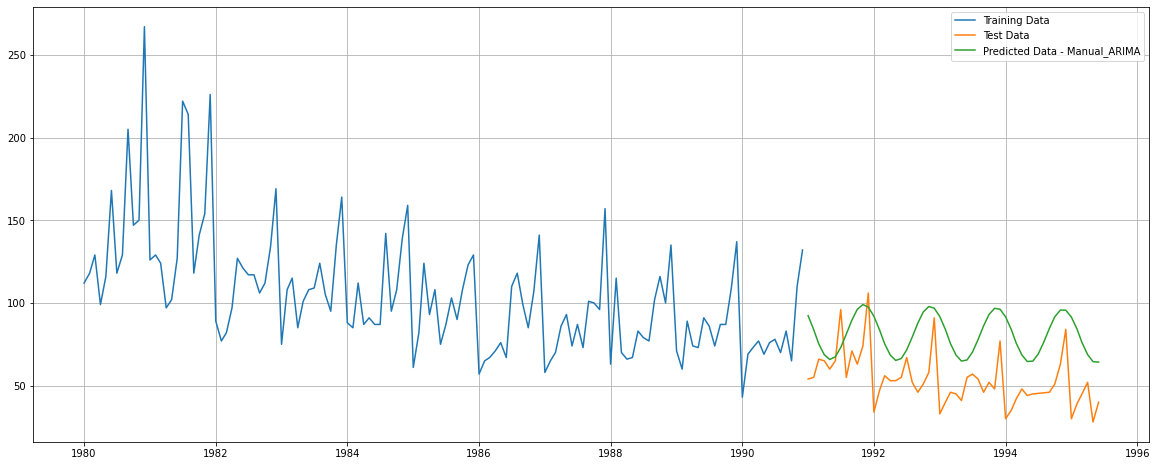

In [297]:
plt.plot(train['Rose'],label='Training Data')
plt.plot(test['Rose'],label='Test Data')
plt.plot(test.index,predicted_manual_ARIMA,label='Predicted Data - Manual_ARIMA')
plt.legend(loc='best')
plt.grid();

In [298]:
temp_resultsDf = pd.DataFrame({'Method': ['Manual_ARIMA(4, 1, 5)'],'RMSE': [rmse_manual_arima]})
resultsDf = pd.concat([resultsDf,temp_resultsDf])
resultsDf

Method       RMSE
0       Linear Regression  15.276000
0             Naive_model  79.738550
0          Simple Average  53.480857
0   moving_avg_forecast_4  14.411000
0   moving_avg_forecast_6  14.503000
0   moving_avg_forecast_8  14.811000
0  moving_avg_forecast_12  15.271000
0    Simple Exp Smoothing  36.977889
0     Holt's Linear Trend  15.713774
0             Holt_Winter  14.233988
0         Holt_Winter Mul  20.325808
0     AUTO_ARIMA(4, 1, 5)  31.945981
0   Manual_ARIMA(4, 1, 5)  31.945981

#### Method 11: Auto SARIMA Model_6

#### Setting the seasonality as 6 for the first iteration of the auto SARIMA model.

In [299]:
import itertools
p = q = range(0, 5)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (0, 1, 3)(0, 0, 3, 6)
Model: (0, 1, 4)(0, 0, 4, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (1, 1, 3)(1, 0, 3, 6)
Model: (1, 1, 4)(1, 0, 4, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)
Model: (2, 1, 3)(2, 0, 3, 6)
Model: (2, 1, 4)(2, 0, 4, 6)
Model: (3, 1, 0)(3, 0, 0, 6)
Model: (3, 1, 1)(3, 0, 1, 6)
Model: (3, 1, 2)(3, 0, 2, 6)
Model: (3, 1, 3)(3, 0, 3, 6)
Model: (3, 1, 4)(3, 0, 4, 6)
Model: (4, 1, 0)(4, 0, 0, 6)
Model: (4, 1, 1)(4, 0, 1, 6)
Model: (4, 1, 2)(4, 0, 2, 6)
Model: (4, 1, 3)(4, 0, 3, 6)
Model: (4, 1, 4)(4, 0, 4, 6)


In [300]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [301]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6)7 - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 6)7 - AIC:1264.4996261113859
SARIMA(0, 1, 0)x(0, 0, 2, 6)7 - AIC:1144.7077471827401
SARIMA(0, 1, 0)x(0, 0, 3, 6)7 - AIC:1081.2713830625194
SARIMA(0, 1, 0)x(0, 0, 4, 6)7 - AIC:977.1491518511871
SARIMA(0, 1, 0)x(1, 0, 0, 6)7 - AIC:1274.7897737087985
SARIMA(0, 1, 0)x(1, 0, 1, 6)7 - AIC:1241.7870945149145
SARIMA(0, 1, 0)x(1, 0, 2, 6)7 - AIC:1146.309326672227
SARIMA(0, 1, 0)x(1, 0, 3, 6)7 - AIC:1058.9861743124334
SARIMA(0, 1, 0)x(1, 0, 4, 6)7 - AIC:978.5946722923766
SARIMA(0, 1, 0)x(2, 0, 0, 6)7 - AIC:1137.9167236212038
SARIMA(0, 1, 0)x(2, 0, 1, 6)7 - AIC:1137.4533629515201
SARIMA(0, 1, 0)x(2, 0, 2, 6)7 - AIC:1117.022442633377
SARIMA(0, 1, 0)x(2, 0, 3, 6)7 - AIC:1058.8048206424758
SARIMA(0, 1, 0)x(2, 0, 4, 6)7 - AIC:970.5079607535915
SARIMA(0, 1, 0)x(3, 0, 0, 6)7 - AIC:1072.5465834695271
SARIMA(0, 1, 0)x(3, 0, 1, 6)7 - AIC:1061.3687765139516
SARIMA(0, 1, 0)x(3, 0, 2, 6)7 - AIC:1058.0425052390726
SARIMA(0, 1, 0)

SARIMA(1, 1, 1)x(0, 0, 1, 6)7 - AIC:1201.5037144424418
SARIMA(1, 1, 1)x(0, 0, 2, 6)7 - AIC:1093.6044317606352
SARIMA(1, 1, 1)x(0, 0, 3, 6)7 - AIC:1016.7345933690776
SARIMA(1, 1, 1)x(0, 0, 4, 6)7 - AIC:924.2699125527607
SARIMA(1, 1, 1)x(1, 0, 0, 6)7 - AIC:1213.6233143130933
SARIMA(1, 1, 1)x(1, 0, 1, 6)7 - AIC:1162.424000437885
SARIMA(1, 1, 1)x(1, 0, 2, 6)7 - AIC:1083.258583438366
SARIMA(1, 1, 1)x(1, 0, 3, 6)7 - AIC:1003.9567058450393
SARIMA(1, 1, 1)x(1, 0, 4, 6)7 - AIC:930.7072546331484
SARIMA(1, 1, 1)x(2, 0, 0, 6)7 - AIC:1083.9006911266893
SARIMA(1, 1, 1)x(2, 0, 1, 6)7 - AIC:1083.1711266749503
SARIMA(1, 1, 1)x(2, 0, 2, 6)7 - AIC:1052.778469726568
SARIMA(1, 1, 1)x(2, 0, 3, 6)7 - AIC:963.6530363743724
SARIMA(1, 1, 1)x(2, 0, 4, 6)7 - AIC:919.9120203186953
SARIMA(1, 1, 1)x(3, 0, 0, 6)7 - AIC:1017.9974834538109
SARIMA(1, 1, 1)x(3, 0, 1, 6)7 - AIC:1021.0487743440701
SARIMA(1, 1, 1)x(3, 0, 2, 6)7 - AIC:1006.9933719490738
SARIMA(1, 1, 1)x(3, 0, 3, 6)7 - AIC:966.2787323840555
SARIMA(1, 1, 1)x(3

SARIMA(2, 1, 2)x(0, 0, 2, 6)7 - AIC:1082.5581033340168
SARIMA(2, 1, 2)x(0, 0, 3, 6)7 - AIC:1005.4894643085994
SARIMA(2, 1, 2)x(0, 0, 4, 6)7 - AIC:917.3111187789666
SARIMA(2, 1, 2)x(1, 0, 0, 6)7 - AIC:1200.42174925109
SARIMA(2, 1, 2)x(1, 0, 1, 6)7 - AIC:1150.7283274244069
SARIMA(2, 1, 2)x(1, 0, 2, 6)7 - AIC:1063.1103218284125
SARIMA(2, 1, 2)x(1, 0, 3, 6)7 - AIC:996.8723967349948
SARIMA(2, 1, 2)x(1, 0, 4, 6)7 - AIC:915.697281928483
SARIMA(2, 1, 2)x(2, 0, 0, 6)7 - AIC:1073.6961457841924
SARIMA(2, 1, 2)x(2, 0, 1, 6)7 - AIC:1070.0771798921135
SARIMA(2, 1, 2)x(2, 0, 2, 6)7 - AIC:1045.2203593708753
SARIMA(2, 1, 2)x(2, 0, 3, 6)7 - AIC:961.0659788171354
SARIMA(2, 1, 2)x(2, 0, 4, 6)7 - AIC:909.2258101754503
SARIMA(2, 1, 2)x(3, 0, 0, 6)7 - AIC:975.6133308807742
SARIMA(2, 1, 2)x(3, 0, 1, 6)7 - AIC:977.0520555080291
SARIMA(2, 1, 2)x(3, 0, 2, 6)7 - AIC:962.9964606633049
SARIMA(2, 1, 2)x(3, 0, 3, 6)7 - AIC:962.7649519590466
SARIMA(2, 1, 2)x(3, 0, 4, 6)7 - AIC:904.5326754038322
SARIMA(2, 1, 2)x(4, 0, 

SARIMA(3, 1, 3)x(0, 0, 4, 6)7 - AIC:910.8622162733159
SARIMA(3, 1, 3)x(1, 0, 0, 6)7 - AIC:1179.1465431631066
SARIMA(3, 1, 3)x(1, 0, 1, 6)7 - AIC:1126.6260872762282
SARIMA(3, 1, 3)x(1, 0, 2, 6)7 - AIC:1057.3117926742814
SARIMA(3, 1, 3)x(1, 0, 3, 6)7 - AIC:982.6950522259385
SARIMA(3, 1, 3)x(1, 0, 4, 6)7 - AIC:903.5899414151676
SARIMA(3, 1, 3)x(2, 0, 0, 6)7 - AIC:1044.9852581507803
SARIMA(3, 1, 3)x(2, 0, 1, 6)7 - AIC:1054.3672228819914
SARIMA(3, 1, 3)x(2, 0, 2, 6)7 - AIC:1037.752443855646
SARIMA(3, 1, 3)x(2, 0, 3, 6)7 - AIC:952.5821050500738
SARIMA(3, 1, 3)x(2, 0, 4, 6)7 - AIC:891.0665409052409
SARIMA(3, 1, 3)x(3, 0, 0, 6)7 - AIC:964.8364659349224
SARIMA(3, 1, 3)x(3, 0, 1, 6)7 - AIC:966.4949686387279
SARIMA(3, 1, 3)x(3, 0, 2, 6)7 - AIC:967.752053959181
SARIMA(3, 1, 3)x(3, 0, 3, 6)7 - AIC:954.4665642804748
SARIMA(3, 1, 3)x(3, 0, 4, 6)7 - AIC:895.0667616965081
SARIMA(3, 1, 3)x(4, 0, 0, 6)7 - AIC:886.70629033308
SARIMA(3, 1, 3)x(4, 0, 1, 6)7 - AIC:899.1777996520195
SARIMA(3, 1, 3)x(4, 0, 2, 

SARIMA(4, 1, 4)x(1, 0, 1, 6)7 - AIC:1103.613961364782
SARIMA(4, 1, 4)x(1, 0, 2, 6)7 - AIC:1049.662403344462
SARIMA(4, 1, 4)x(1, 0, 3, 6)7 - AIC:960.7766382355594
SARIMA(4, 1, 4)x(1, 0, 4, 6)7 - AIC:878.8376398339109
SARIMA(4, 1, 4)x(2, 0, 0, 6)7 - AIC:1054.8931763219985
SARIMA(4, 1, 4)x(2, 0, 1, 6)7 - AIC:1045.5325801767597
SARIMA(4, 1, 4)x(2, 0, 2, 6)7 - AIC:1023.5356632396112
SARIMA(4, 1, 4)x(2, 0, 3, 6)7 - AIC:932.1565676454494
SARIMA(4, 1, 4)x(2, 0, 4, 6)7 - AIC:889.5421637940002
SARIMA(4, 1, 4)x(3, 0, 0, 6)7 - AIC:957.7717338257885
SARIMA(4, 1, 4)x(3, 0, 1, 6)7 - AIC:958.3077472124177
SARIMA(4, 1, 4)x(3, 0, 2, 6)7 - AIC:951.3024724710373
SARIMA(4, 1, 4)x(3, 0, 3, 6)7 - AIC:934.1468194874354
SARIMA(4, 1, 4)x(3, 0, 4, 6)7 - AIC:883.9355041107821
SARIMA(4, 1, 4)x(4, 0, 0, 6)7 - AIC:881.741223190492
SARIMA(4, 1, 4)x(4, 0, 1, 6)7 - AIC:886.7775930714103
SARIMA(4, 1, 4)x(4, 0, 2, 6)7 - AIC:885.5267252306899
SARIMA(4, 1, 4)x(4, 0, 3, 6)7 - AIC:885.0542807646789
SARIMA(4, 1, 4)x(4, 0, 4, 

In [302]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param      seasonal         AIC
374  (2, 1, 4)  (4, 0, 4, 6)  870.449739
499  (3, 1, 4)  (4, 0, 4, 6)  872.394848
124  (0, 1, 4)  (4, 0, 4, 6)  873.187581
624  (4, 1, 4)  (4, 0, 4, 6)  874.074606
249  (1, 1, 4)  (4, 0, 4, 6)  877.442691

In [303]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(2, 1, 4),
                                seasonal_order=(4, 0, 4, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(2, 1, 4)x(4, 0, 4, 6)   Log Likelihood                -420.225
Date:                           Fri, 23 Dec 2022   AIC                            870.450
Time:                                   05:49:18   BIC                            909.824
Sample:                                        0   HQIC                           886.394
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9320      0.044    -20.952      0.000      -1.019      -0.845
ar.L2         -0.9271      0.041    -22.357

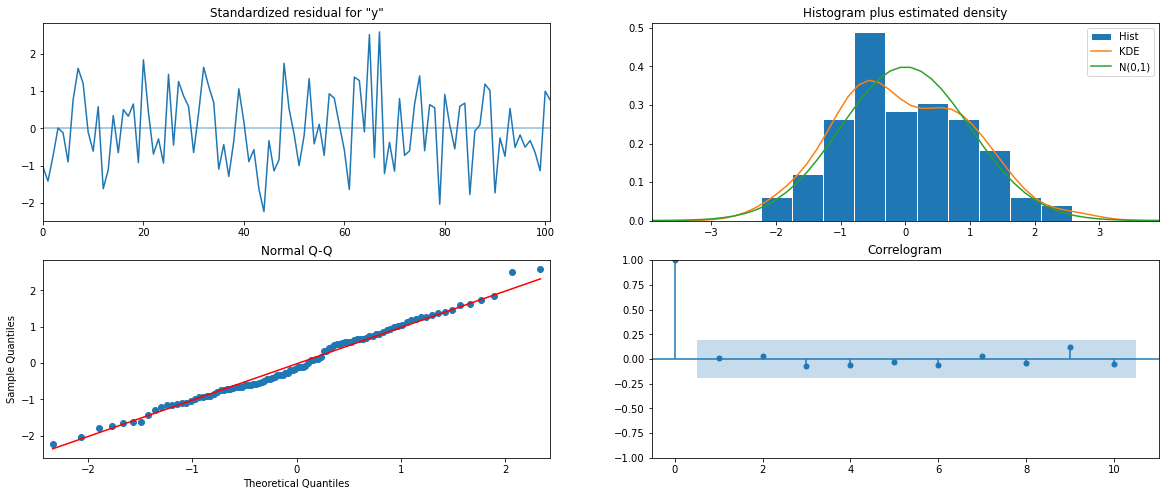

In [304]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

#### Predict on Test and evaluate the model

In [306]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))

In [307]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  62.934965  13.878361      35.733877      90.136052
1  72.616207  14.088696      45.002870     100.229543
2  78.050283  14.143001      50.330511     105.770056
3  74.694938  14.144889      46.971464     102.418411
4  78.653652  14.150381      50.919415     106.387888

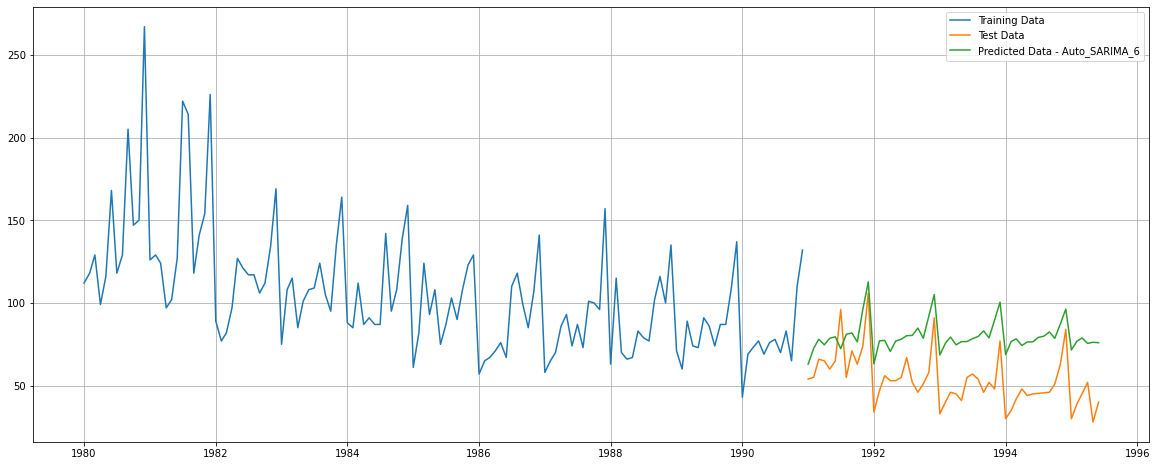

In [308]:
plt.plot(train['Rose'],label='Training Data')
plt.plot(test['Rose'],label='Test Data')
plt.plot(test.index,predicted_auto_SARIMA_6.predicted_mean,label='Predicted Data - Auto_SARIMA_6')
plt.legend(loc='best')
plt.grid();

In [309]:
rmse_auto_SARIMA_6 = mean_squared_error(test['Rose'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print('RMSE:',rmse_auto_SARIMA_6)


RMSE: 28.611259961894635


In [310]:
temp_resultsDf = pd.DataFrame({'Method': ['Auto_SARIMA_6(2,1,4)(4,0,4,6)'], 'RMSE': [rmse_auto_SARIMA_6]})
resultsDf = pd.concat([resultsDf,temp_resultsDf])
resultsDf

Method       RMSE
0              Linear Regression  15.276000
0                    Naive_model  79.738550
0                 Simple Average  53.480857
0          moving_avg_forecast_4  14.411000
0          moving_avg_forecast_6  14.503000
0          moving_avg_forecast_8  14.811000
0         moving_avg_forecast_12  15.271000
0           Simple Exp Smoothing  36.977889
0            Holt's Linear Trend  15.713774
0                    Holt_Winter  14.233988
0                Holt_Winter Mul  20.325808
0            AUTO_ARIMA(4, 1, 5)  31.945981
0          Manual_ARIMA(4, 1, 5)  31.945981
0  Auto_SARIMA_6(2,1,4)(4,0,4,6)  28.611260

#### Method 12: Auto SARIMA Model_12

In [311]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [312]:
SARIMA_AIC_12 = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_12

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [314]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC_12 = SARIMA_AIC_12.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12)7 - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12)7 - AIC:1145.4230827207175
SARIMA(0, 1, 0)x(0, 0, 2, 12)7 - AIC:976.4375296380894
SARIMA(0, 1, 0)x(1, 0, 0, 12)7 - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12)7 - AIC:1116.0207869386002
SARIMA(0, 1, 0)x(1, 0, 2, 12)7 - AIC:969.6913635753448
SARIMA(0, 1, 0)x(2, 0, 0, 12)7 - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12)7 - AIC:962.8794540697546
SARIMA(0, 1, 0)x(2, 0, 2, 12)7 - AIC:955.5735408945653
SARIMA(0, 1, 1)x(0, 0, 0, 12)7 - AIC:1263.5369097383964
SARIMA(0, 1, 1)x(0, 0, 1, 12)7 - AIC:1098.5554825918339
SARIMA(0, 1, 1)x(0, 0, 2, 12)7 - AIC:923.631404938387
SARIMA(0, 1, 1)x(1, 0, 0, 12)7 - AIC:1095.793632491795
SARIMA(0, 1, 1)x(1, 0, 1, 12)7 - AIC:1054.743433094548
SARIMA(0, 1, 1)x(1, 0, 2, 12)7 - AIC:918.8573483293343
SARIMA(0, 1, 1)x(2, 0, 0, 12)7 - AIC:914.5982866536075
SARIMA(0, 1, 1)x(2, 0, 1, 12)7 - AIC:915.3332430461666
SARIMA(0, 1, 1)x(2, 0, 2, 12)7 - AIC:901.1988256216015
SARIMA

In [315]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param      seasonal         AIC
374  (2, 1, 4)  (4, 0, 4, 6)  870.449739
499  (3, 1, 4)  (4, 0, 4, 6)  872.394848
124  (0, 1, 4)  (4, 0, 4, 6)  873.187581
624  (4, 1, 4)  (4, 0, 4, 6)  874.074606
249  (1, 1, 4)  (4, 0, 4, 6)  877.442691

In [317]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(2, 1, 4),
                                seasonal_order=(2, 0, 4, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(2, 1, 4)x(2, 0, 4, 6)   Log Likelihood                -426.771
Date:                           Fri, 23 Dec 2022   AIC                            879.542
Time:                                   06:02:12   BIC                            913.667
Sample:                                        0   HQIC                           893.360
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9914      0.024    -41.819      0.000      -1.038      -0.945
ar.L2         -0.9906      0.019    -53.050

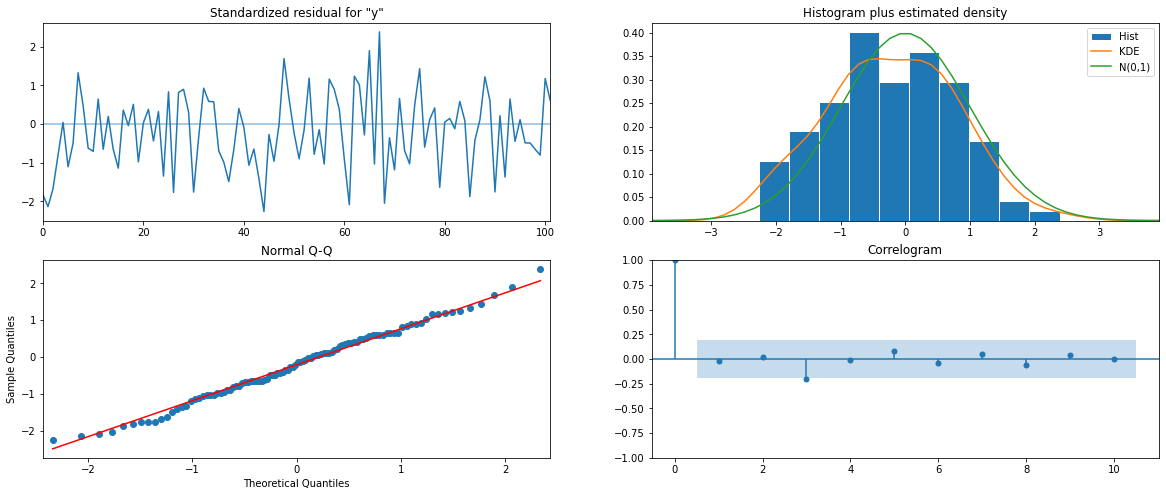

In [319]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

#### Predict on the Test Set using this model and evaluate the model.

In [320]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [321]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  59.200623  15.051038      29.701130      88.700116
1  70.320708  15.401183      40.134945     100.506472
2  81.745483  15.505278      51.355697     112.135269
3  65.989165  15.595621      35.422309      96.556021
4  75.806046  15.613656      45.203843     106.408248

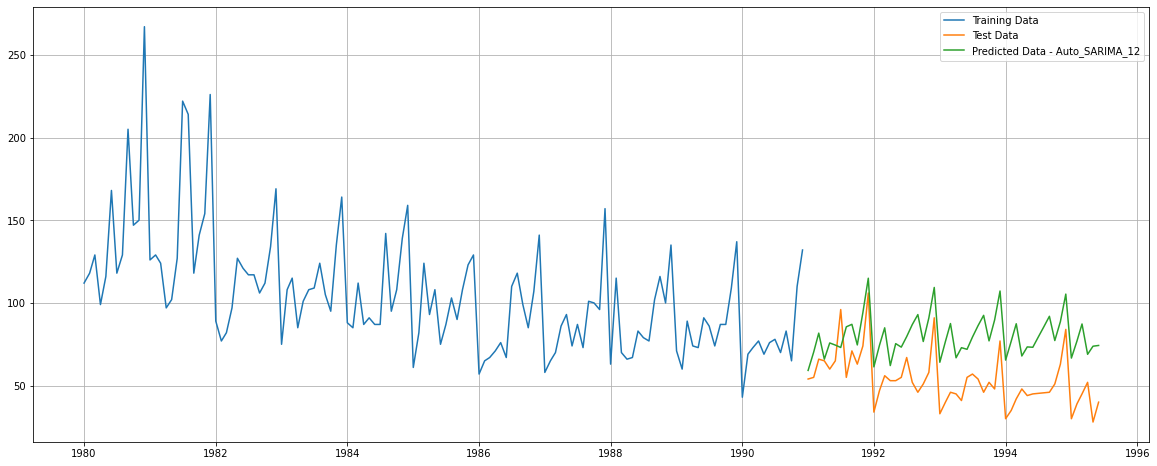

In [322]:
plt.plot(train['Rose'],label='Training Data')
plt.plot(test['Rose'],label='Test Data')
plt.plot(test.index,predicted_auto_SARIMA_12.predicted_mean,label='Predicted Data - Auto_SARIMA_12')
plt.legend(loc='best')
plt.grid();

In [324]:
rmse_auto_SARIMA_12 = mean_squared_error(test['Rose'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print('RMSE:',rmse_auto_SARIMA_12)


RMSE: 29.453616633773905


In [325]:
temp_resultsDf = pd.DataFrame({'Method':['Auto_SARIMA_12(2, 1, 4)(2, 0, 4, 6)'],'RMSE': [rmse_auto_SARIMA_12]})
resultsDf = pd.concat([resultsDf,temp_resultsDf])
resultsDf

Method       RMSE
0                    Linear Regression  15.276000
0                          Naive_model  79.738550
0                       Simple Average  53.480857
0                moving_avg_forecast_4  14.411000
0                moving_avg_forecast_6  14.503000
0                moving_avg_forecast_8  14.811000
0               moving_avg_forecast_12  15.271000
0                 Simple Exp Smoothing  36.977889
0                  Holt's Linear Trend  15.713774
0                          Holt_Winter  14.233988
0                      Holt_Winter Mul  20.325808
0                  AUTO_ARIMA(4, 1, 5)  31.945981
0                Manual_ARIMA(4, 1, 5)  31.945981
0        Auto_SARIMA_6(2,1,4)(4,0,4,6)  28.611260
0  Auto_SARIMA_12(2, 1, 4)(2, 0, 4, 6)  29.453617

#### Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. - Seasonality at 6

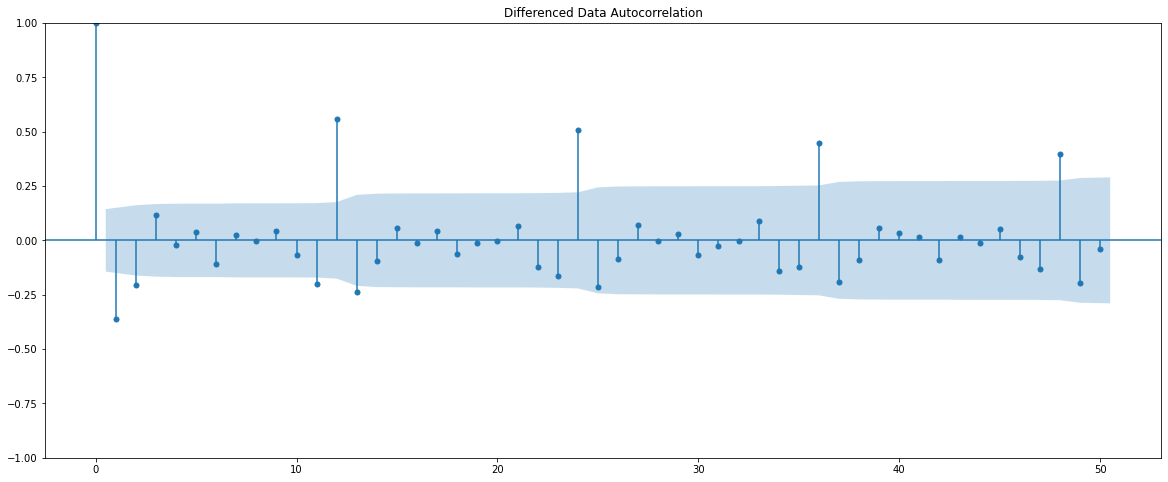

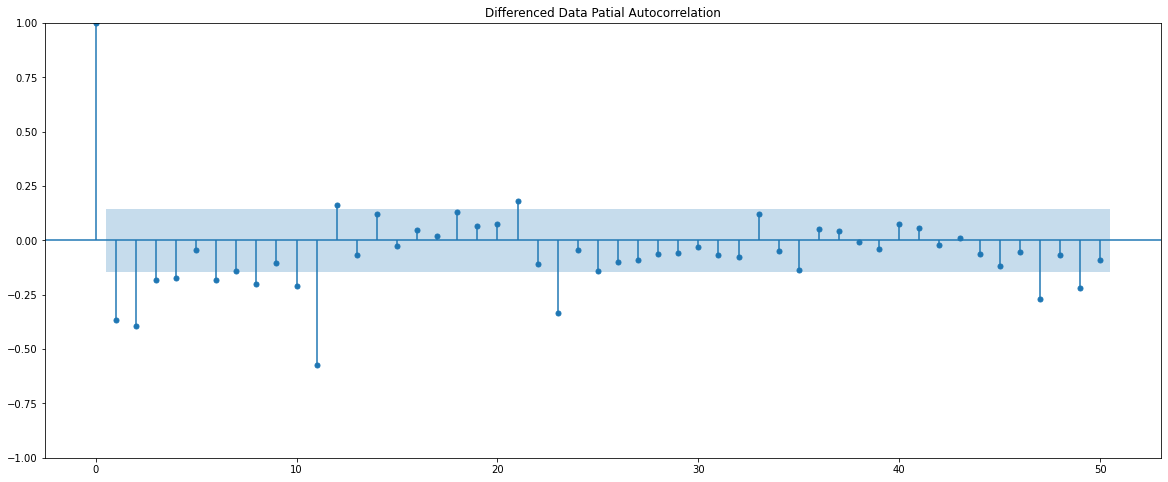

In [326]:
plot_acf(df_imputed['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df_imputed['Rose'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

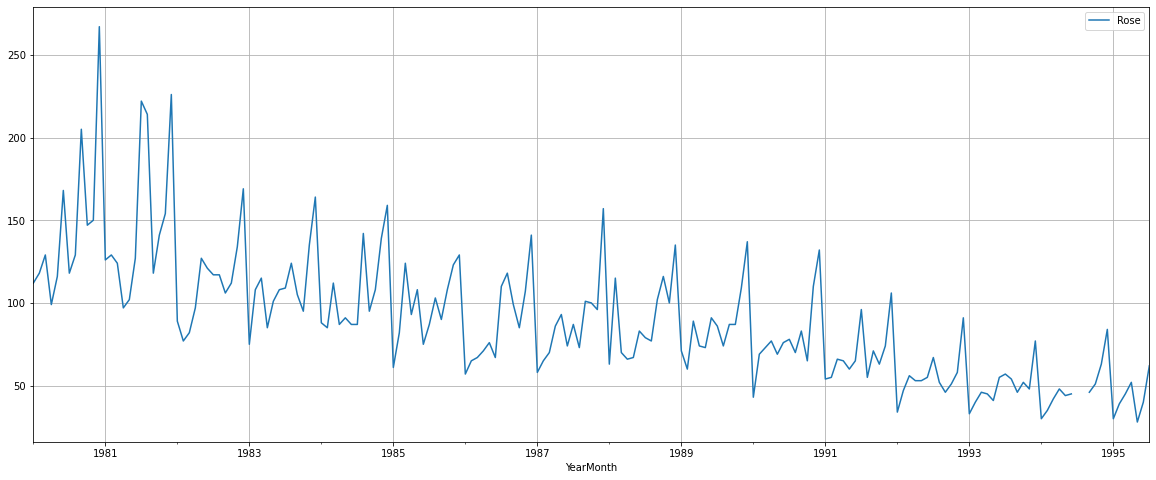

In [327]:
df_rose.plot()
plt.grid();

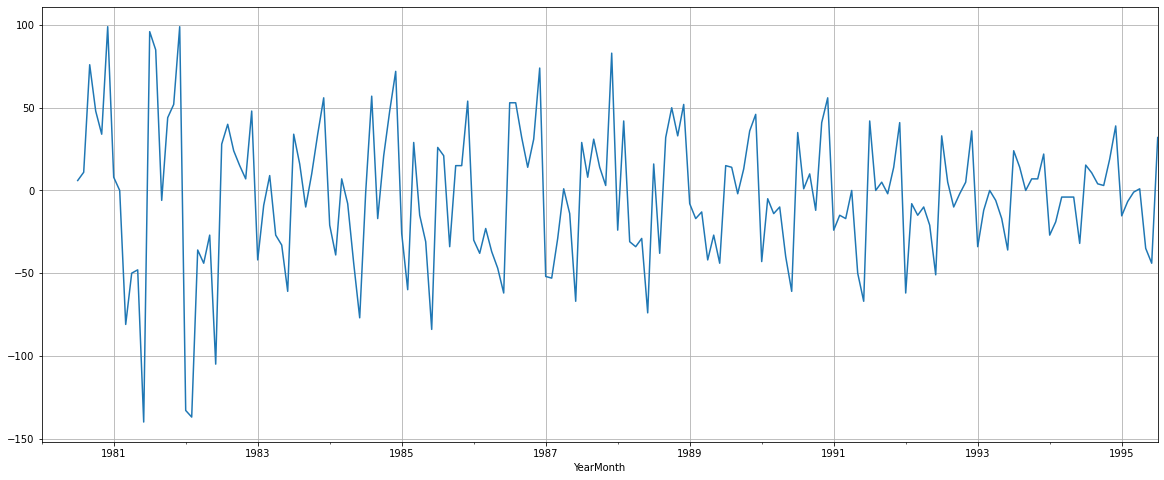

In [328]:
(df_imputed['Rose'].diff(6)).plot()
plt.grid();

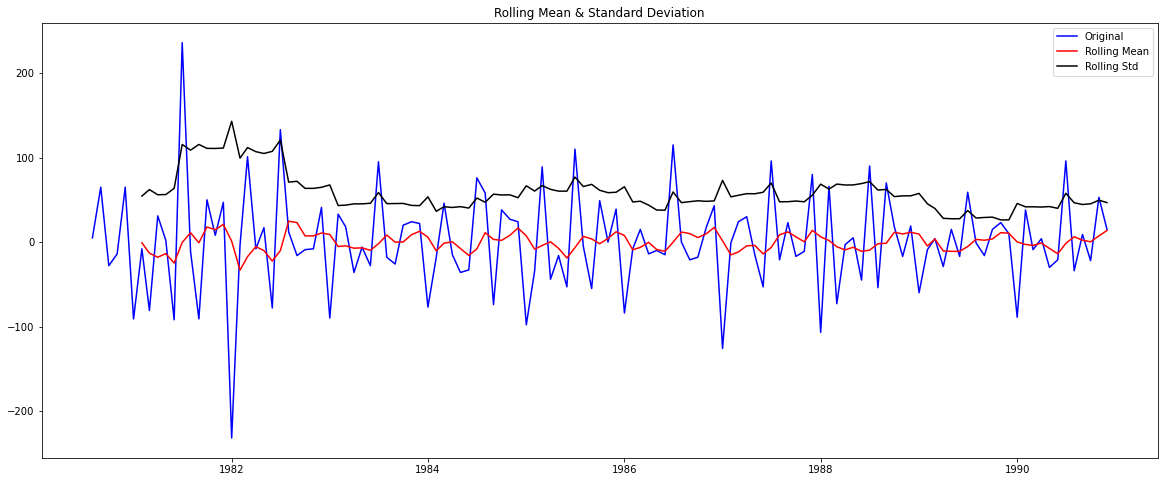

Results of Dickey-Fuller Test:
Test Statistic                -6.882869e+00
p-value                        1.418693e-09
#Lags Used                     1.300000e+01
Number of Observations Used    1.110000e+02
Critical Value (1%)           -3.490683e+00
Critical Value (5%)           -2.887952e+00
Critical Value (10%)          -2.580857e+00
dtype: float64 



In [329]:
test_stationarity((train['Rose'].diff(6).dropna()).diff(1).dropna())

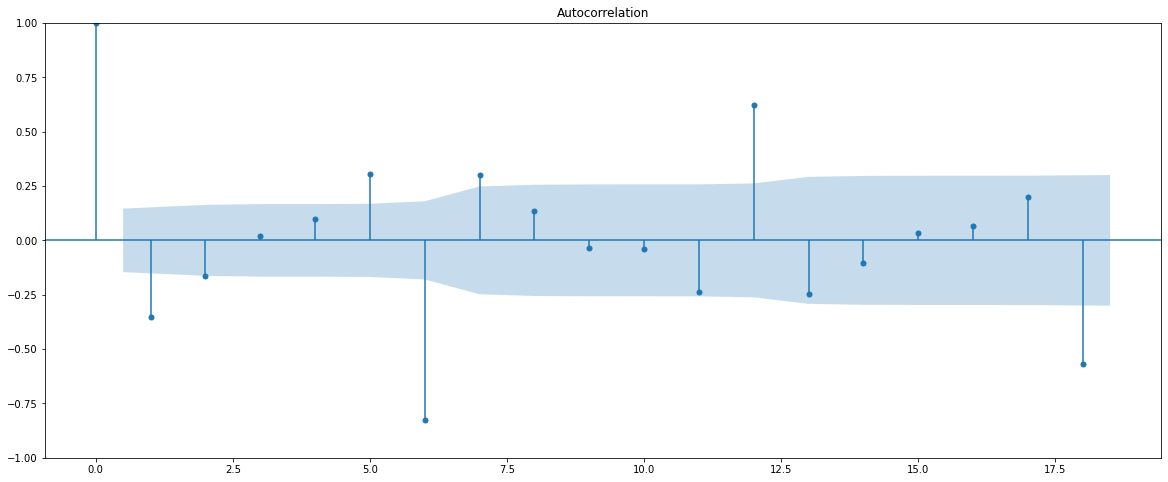

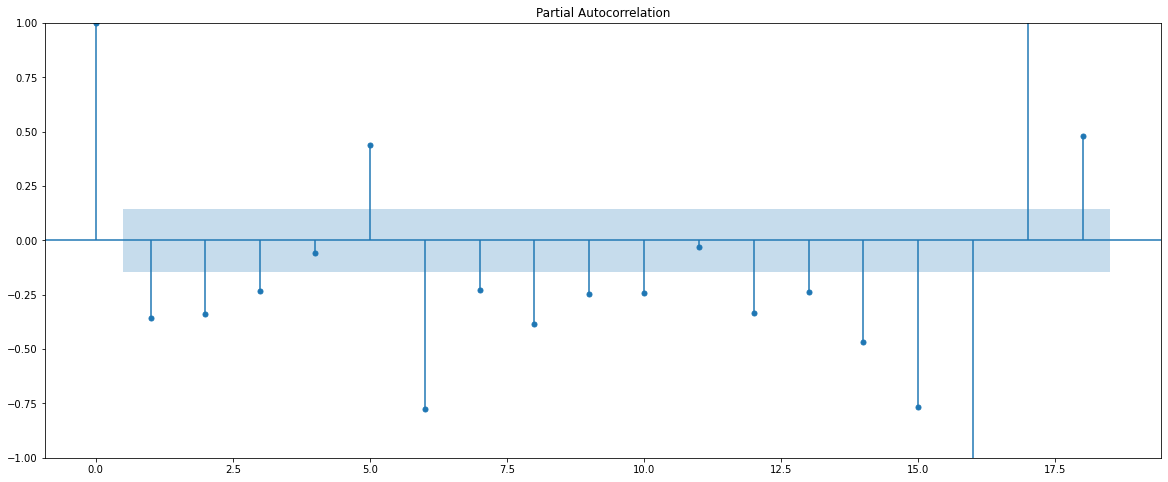

In [330]:
plot_acf((df_imputed['Rose'].diff(6).dropna()).diff(1).dropna(),lags=18)
plot_pacf((df_imputed['Rose'].diff(6).dropna()).diff(1).dropna(),lags=18);

In [331]:
import statsmodels.api as sm

manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(3, 1, 1),
                                seasonal_order=(2, 1, 4, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

                                          SARIMAX Results                                           
Dep. Variable:                                            y   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(2, 1, [1, 2, 3, 4], 6)   Log Likelihood                -417.602
Date:                                      Fri, 23 Dec 2022   AIC                            857.205
Time:                                              10:50:35   BIC                            885.751
Sample:                                                   0   HQIC                           868.755
                                                      - 132                                         
Covariance Type:                                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1298      0.130  

Predict on the Test Set using this model and evaluate the model.

In [332]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test))

In [333]:
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  54.112792  16.074692      22.606975      85.618610
1  61.097200  16.780896      28.207249      93.987151
2  71.098006  17.185040      37.415947     104.780065
3  70.358346  17.202505      36.642056     104.074637
4  71.940053  17.336683      37.960779     105.919327

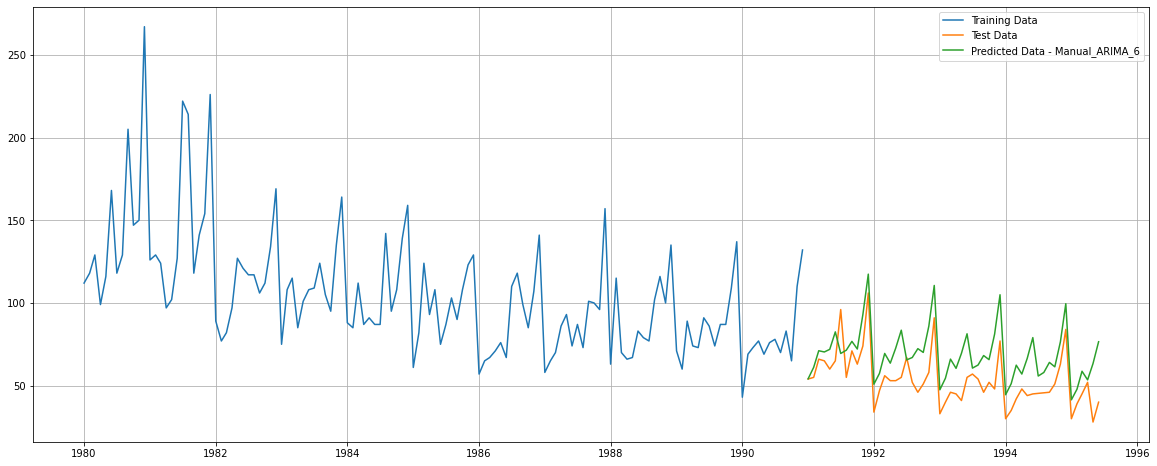

In [334]:
plt.plot(train['Rose'],label='Training Data')
plt.plot(test['Rose'],label='Test Data')
plt.plot(test.index,predicted_manual_SARIMA_6.predicted_mean,label='Predicted Data - Manual_ARIMA_6')
plt.legend(loc='best')
plt.grid();

In [336]:
rmse_manual_6 = mean_squared_error(test['Rose'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print('RMSE:',rmse_manual_6)


RMSE: 18.46665915701986


In [337]:
temp_resultsDf = pd.DataFrame({'Method':['Manual_SARIMA_6(3,1,1)(2,1,4,6)'],'RMSE': [rmse_manual_6]})
resultsDf = pd.concat([resultsDf,temp_resultsDf])
resultsDf

Method       RMSE
0                    Linear Regression  15.276000
0                          Naive_model  79.738550
0                       Simple Average  53.480857
0                moving_avg_forecast_4  14.411000
0                moving_avg_forecast_6  14.503000
0                moving_avg_forecast_8  14.811000
0               moving_avg_forecast_12  15.271000
0                 Simple Exp Smoothing  36.977889
0                  Holt's Linear Trend  15.713774
0                          Holt_Winter  14.233988
0                      Holt_Winter Mul  20.325808
0                  AUTO_ARIMA(4, 1, 5)  31.945981
0                Manual_ARIMA(4, 1, 5)  31.945981
0        Auto_SARIMA_6(2,1,4)(4,0,4,6)  28.611260
0  Auto_SARIMA_12(2, 1, 4)(2, 0, 4, 6)  29.453617
0      Manual_SARIMA_6(3,1,1)(2,1,4,6)  18.466659

Manual SARIMA model_12

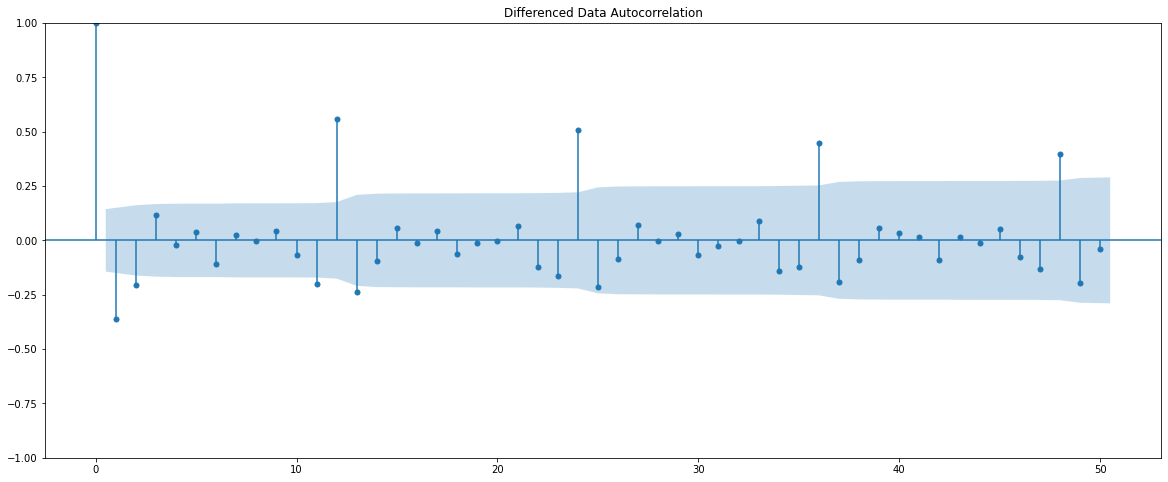

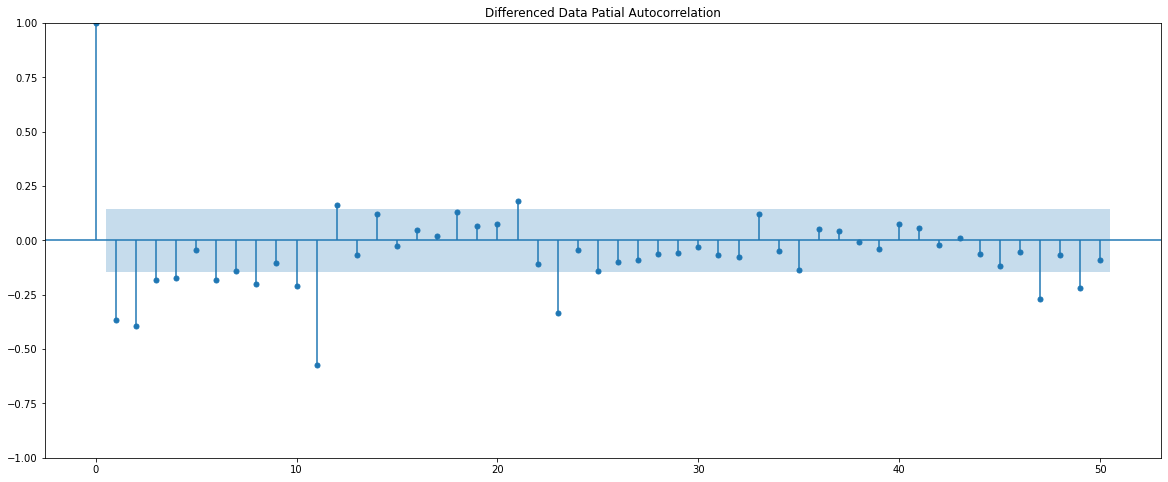

In [338]:
plot_acf(df_imputed['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df_imputed['Rose'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

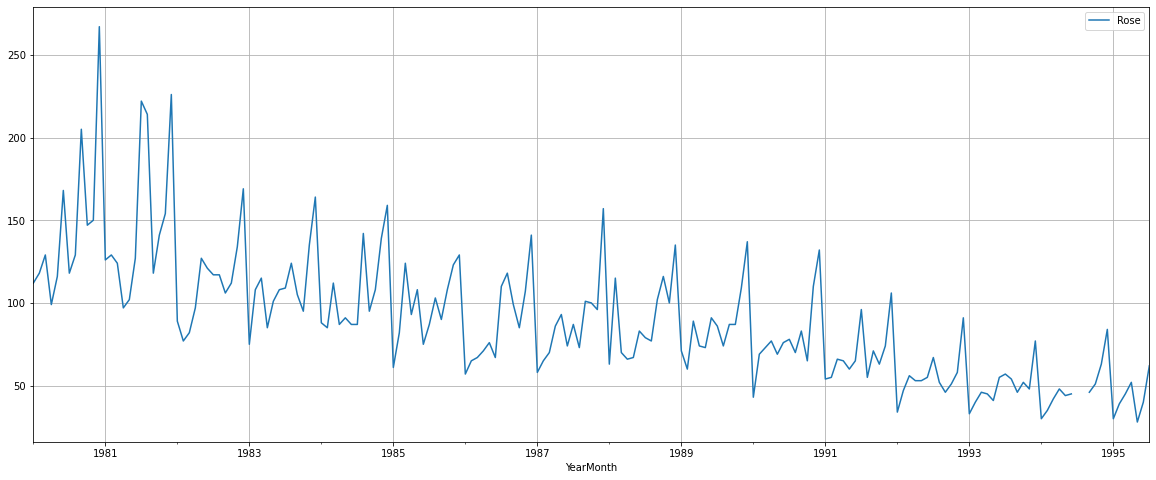

In [340]:
df_rose.plot()
plt.grid();

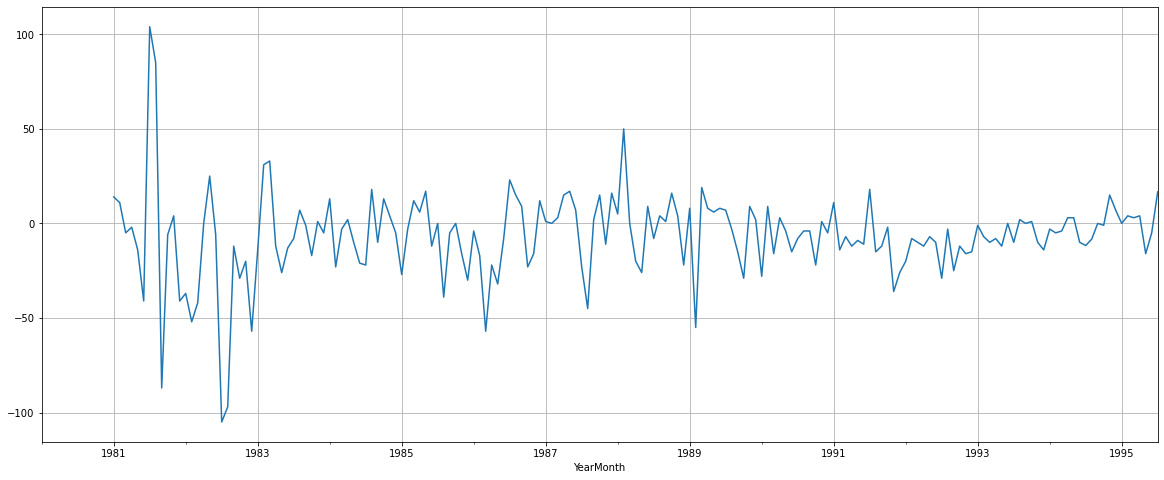

In [341]:
(df_imputed['Rose'].diff(12)).plot()
plt.grid();

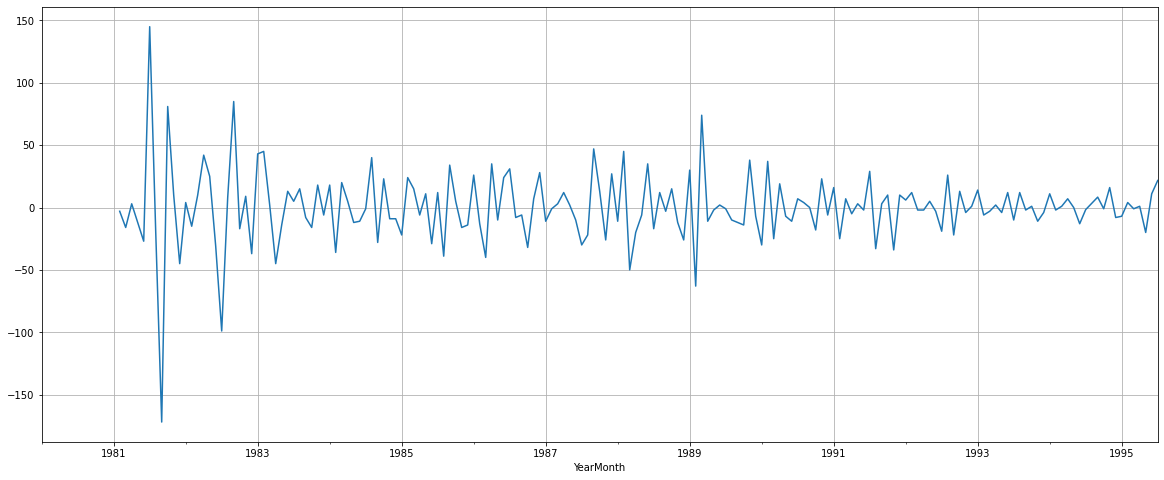

In [343]:
(df_imputed['Rose'].diff(12)).diff().plot()
plt.grid();

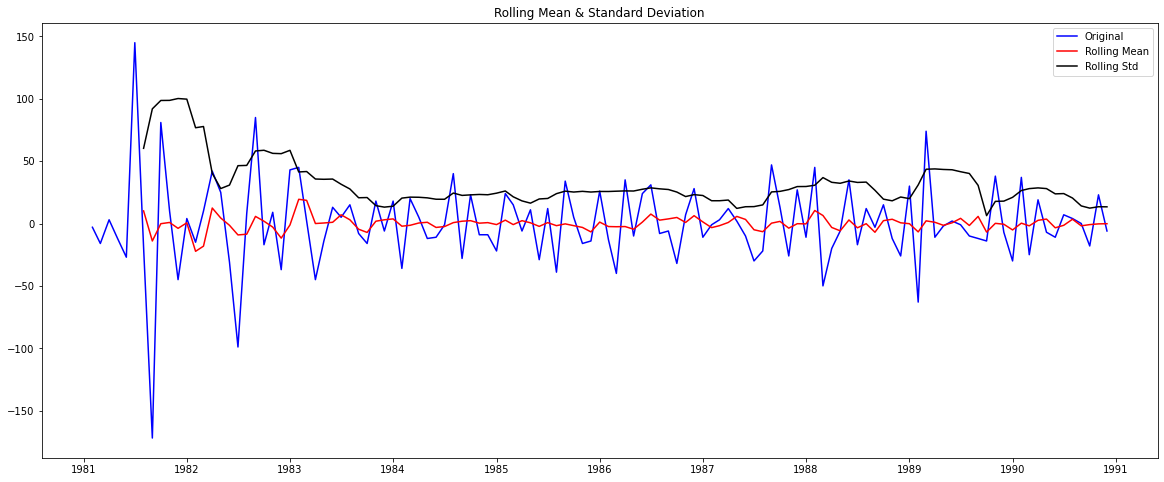

Results of Dickey-Fuller Test:
Test Statistic                  -3.692348
p-value                          0.004222
#Lags Used                      11.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64 



In [344]:
test_stationarity((train['Rose'].diff(12).dropna()).diff(1).dropna())

Checking ACF and PACF plots

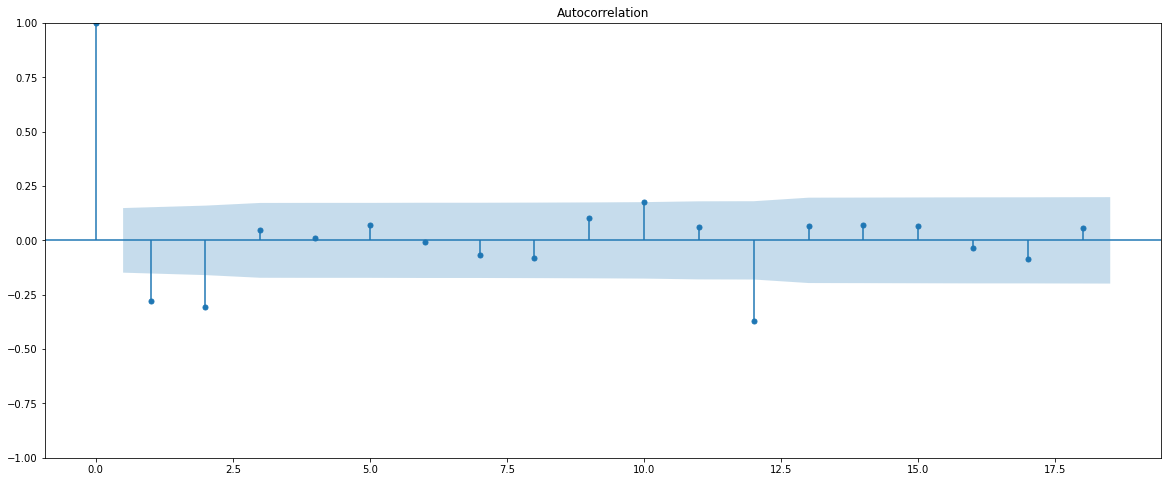

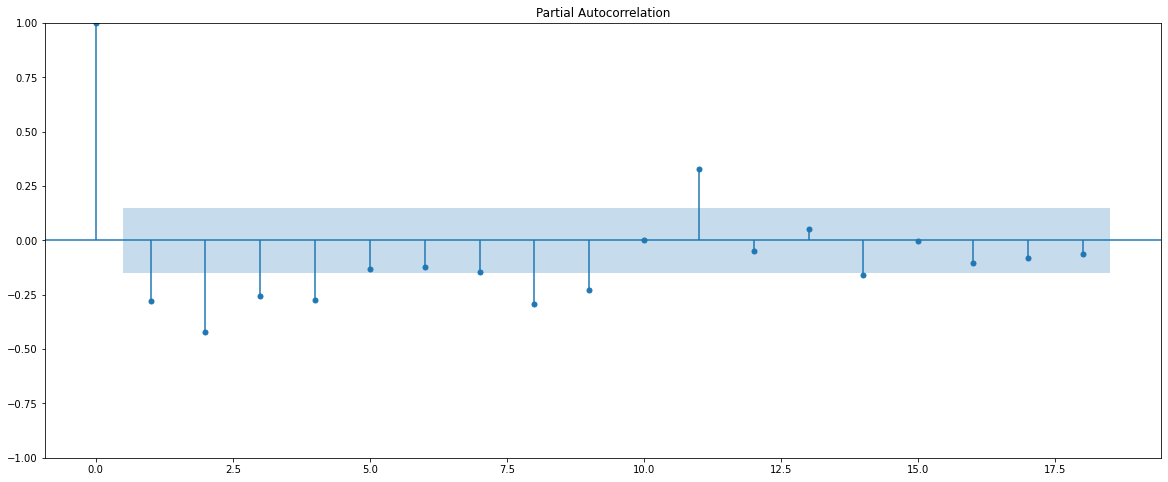

In [345]:
plot_acf((df_imputed['Rose'].diff(12).dropna()).diff(1).dropna(),lags=18)
plot_pacf((df_imputed['Rose'].diff(12).dropna()).diff(1).dropna(),lags=18);

In [346]:
import statsmodels.api as sm

manual_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(2, 1, 2),
                                seasonal_order=(4, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_12 = manual_SARIMA_12.fit(maxiter=1000)
print(results_manual_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(4, 1, 2, 12)   Log Likelihood                -284.472
Date:                            Fri, 23 Dec 2022   AIC                            590.945
Time:                                    11:08:07   BIC                            615.520
Sample:                                         0   HQIC                           600.695
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9798      0.224     -4.366      0.000      -1.420      -0.540
ar.L2         -0.1273      0.143   

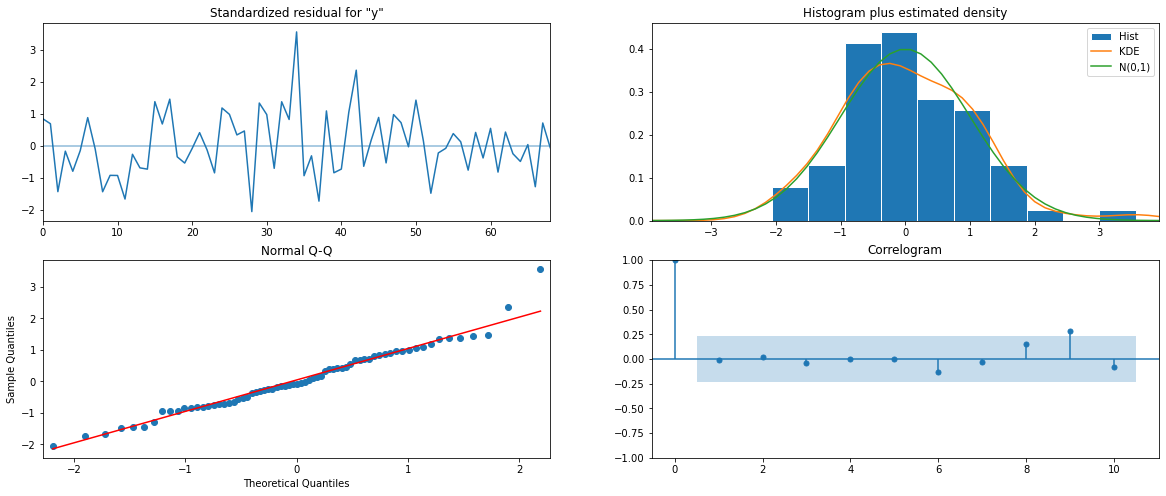

In [347]:
results_manual_SARIMA_12.plot_diagnostics()
plt.show()

Predict on the Test Set using this model and evaluate the model

In [348]:
predicted_manual_SARIMA_12 = results_manual_SARIMA_12.get_forecast(steps=len(test))

In [349]:
predicted_manual_SARIMA_12.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  43.920163  14.046535      16.389461      71.450865
1  72.291778  14.055714      44.743084      99.840472
2  63.958945  14.045598      36.430079      91.487810
3  60.120458  14.229049      32.232035      88.008881
4  61.345022  14.219796      33.474733      89.215310

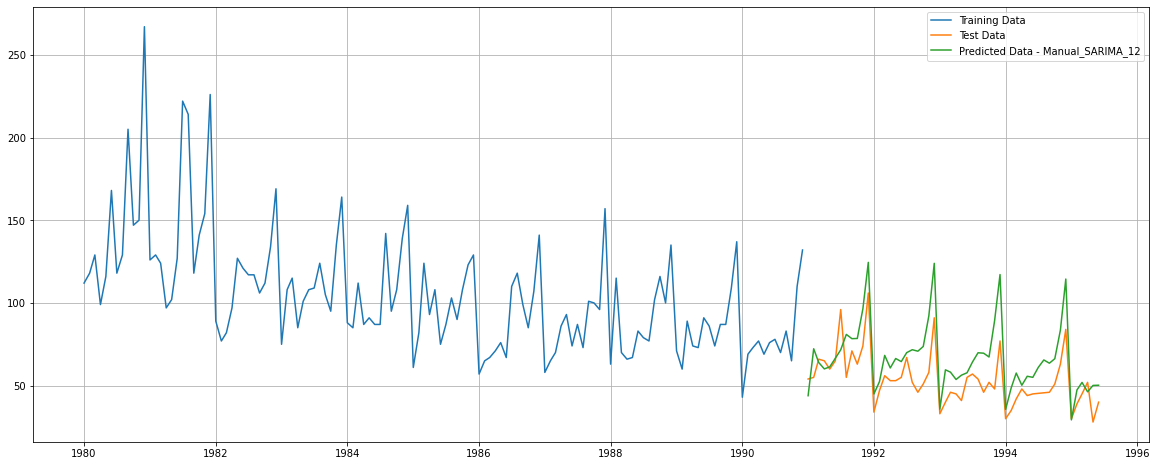

In [350]:
plt.plot(train['Rose'],label='Training Data')
plt.plot(test['Rose'],label='Test Data')
plt.plot(test.index,predicted_manual_SARIMA_12.predicted_mean,label='Predicted Data - Manual_SARIMA_12')
plt.legend(loc='best')
plt.grid();

In [351]:
rmse_manual_sarima_12 = mean_squared_error(test['Rose'],predicted_manual_SARIMA_12.predicted_mean,squared=False)
print('RMSE:',rmse_manual_sarima_12)

RMSE: 17.486984903064197


### 8. Build a table with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [352]:
temp_resultsDf = pd.DataFrame({'Method': ['Manual_SARIMA_12(2,1,2)(4,1,2,12)'],'RMSE': [rmse_manual_sarima_12]})
resultsDf = pd.concat([resultsDf,temp_resultsDf])
resultsDf

Method       RMSE
0                    Linear Regression  15.276000
0                          Naive_model  79.738550
0                       Simple Average  53.480857
0                moving_avg_forecast_4  14.411000
0                moving_avg_forecast_6  14.503000
0                moving_avg_forecast_8  14.811000
0               moving_avg_forecast_12  15.271000
0                 Simple Exp Smoothing  36.977889
0                  Holt's Linear Trend  15.713774
0                          Holt_Winter  14.233988
0                      Holt_Winter Mul  20.325808
0                  AUTO_ARIMA(4, 1, 5)  31.945981
0                Manual_ARIMA(4, 1, 5)  31.945981
0        Auto_SARIMA_6(2,1,4)(4,0,4,6)  28.611260
0  Auto_SARIMA_12(2, 1, 4)(2, 0, 4, 6)  29.453617
0      Manual_SARIMA_6(3,1,1)(2,1,4,6)  18.466659
0    Manual_SARIMA_12(2,1,2)(4,1,2,12)  17.486985

### Building the most optimum model on the Full Data

### 9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

In [353]:
full_data_model = sm.tsa.statespace.SARIMAX(df_imputed['Rose'],
                                order=(2,1,2),
                                seasonal_order=(4, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  187
Model:             SARIMAX(2, 1, 2)x(4, 1, 2, 12)   Log Likelihood                -492.373
Date:                            Fri, 23 Dec 2022   AIC                           1006.747
Time:                                    17:37:58   BIC                           1037.770
Sample:                                01-01-1980   HQIC                          1019.349
                                     - 07-01-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0124      0.104      9.701      0.000       0.808       1.217
ar.L2         -0.1788      0.110   

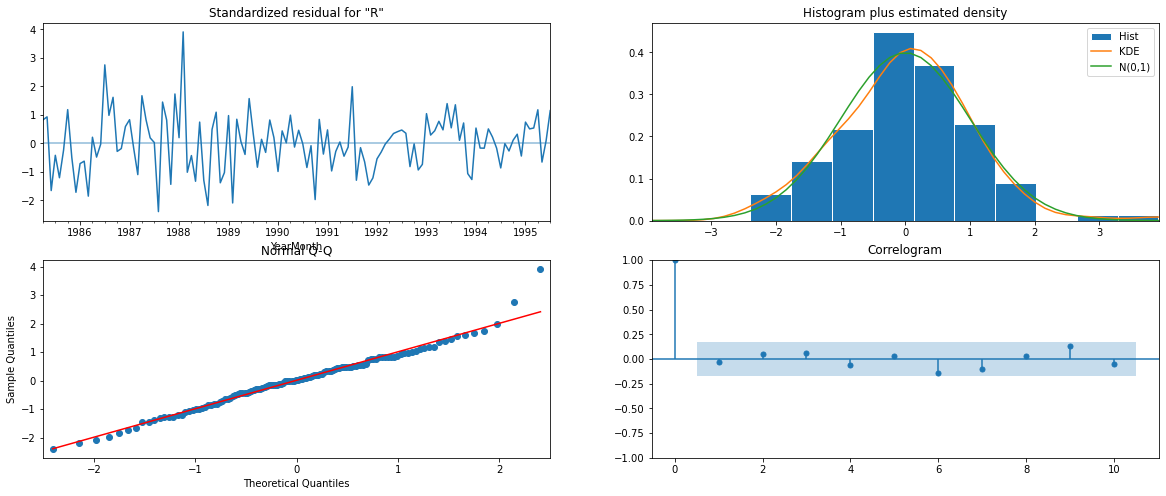

In [354]:
results_full_data_model.plot_diagnostics();

#### Evaluate the model on the whole and predict 12 months into the future (till the end of next year).

In [355]:
predicted_manual_SARIMA_12_full_data = results_full_data_model.get_forecast(steps=12)

In [356]:
predicted_manual_SARIMA_12_full_data.summary_frame(alpha=0.05).head(12)

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1995-08-01  42.888301  12.308837      18.763423      67.013179
1995-09-01  43.829460  12.341862      19.639855      68.019066
1995-10-01  46.341608  12.358784      22.118837      70.564380
1995-11-01  59.112491  12.360308      34.886733      83.338249
1995-12-01  87.926178  12.367942      63.685457     112.166899
1996-01-01  26.201596  12.416320       1.866055      50.537136
1996-02-01  35.188540  12.520606      10.648603      59.728476
1996-03-01  42.858321  12.684781      17.996606      67.720036
1996-04-01  45.031965  12.903406      19.741753      70.322176
1996-05-01  36.887037  13.167454      11.079302      62.694773
1996-06-01  44.292351  13.467333      17.896864      70.687838
1996-07-01  56.475989  13.794132      29.439987      83.511992

In [357]:
rmse_full_data = mean_squared_error(df_imputed['Rose'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse_full_data)


RMSE of the Full Model 44.37221056639482


In [360]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_12_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-01',end='1996-08-01', freq='M'))

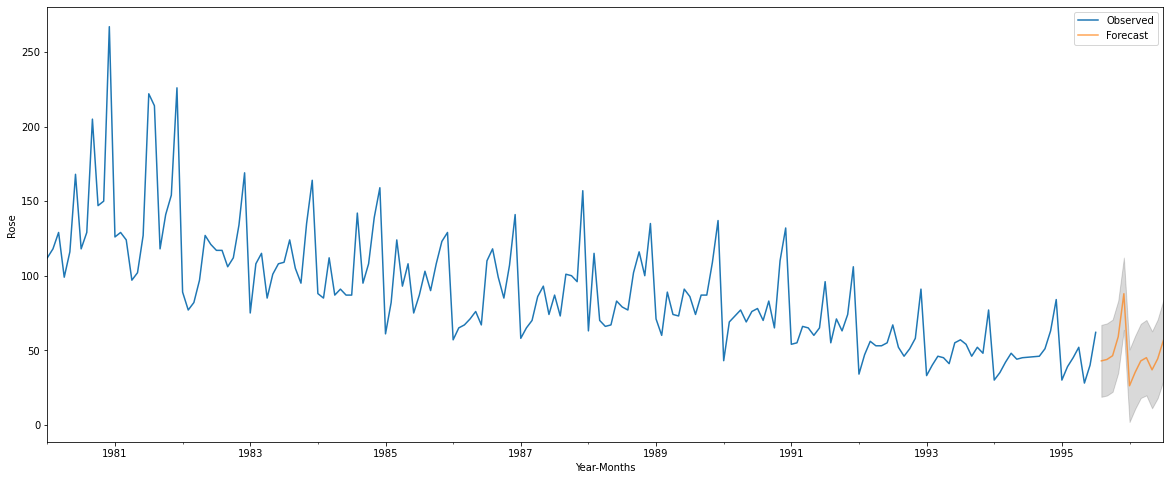

In [361]:
# plot the forecast along with the confidence band

axis = df_imputed['Rose'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Rose')
plt.legend(loc='best')
plt.show()

In [362]:
temp_resultsDf = pd.DataFrame({'Method':['Fulldata_Manual_SARIMA(2,1,2)(4,1,2,12)'],'RMSE': [rmse_full_data]})
resultsDf = pd.concat([resultsDf,temp_resultsDf])
resultsDf

Method       RMSE
0                        Linear Regression  15.276000
0                              Naive_model  79.738550
0                           Simple Average  53.480857
0                    moving_avg_forecast_4  14.411000
0                    moving_avg_forecast_6  14.503000
0                    moving_avg_forecast_8  14.811000
0                   moving_avg_forecast_12  15.271000
0                     Simple Exp Smoothing  36.977889
0                      Holt's Linear Trend  15.713774
0                              Holt_Winter  14.233988
0                          Holt_Winter Mul  20.325808
0                      AUTO_ARIMA(4, 1, 5)  31.945981
0                    Manual_ARIMA(4, 1, 5)  31.945981
0            Auto_SARIMA_6(2,1,4)(4,0,4,6)  28.611260
0      Auto_SARIMA_12(2, 1, 4)(2, 0, 4, 6)  29.453617
0          Manual_SARIMA_6(3,1,1)(2,1,4,6)  18.466659
0        Manual_SARIMA_12(2,1,2)(4,1,2,12)  17.486985
0  Fulldata_Manual_SARIMA(2,1,2)(4,1,2,12)  44.372211